## Credit Card Fraud Detection


### Business Overview

For many banks, retaining high profitable customers is the number one business goal. Banking fraud, however, poses a significant threat to this goal for different banks. In terms of substantial financial losses, trust and credibility, this is a concerning issue to both banks and customers alike.


It has been estimated by Nilson report that by 2020 the banking frauds would account to $30 billion worldwide. With the rise in digital payment channels, the number of fraudulent transactions is also increasing with new and different ways. 

In the banking industry, credit card fraud detection using machine learning is not just a trend but a necessity for them to put proactive monitoring and fraud prevention mechanisms in place. Machine learning is helping these institutions to reduce time-consuming manual reviews, costly chargebacks and fees, and denials of legitimate transactions.


### Understanding and Defining Fraud

Credit card fraud is any dishonest act and behaviour to obtain information without the proper authorization from the account holder for financial gain. Among different ways of frauds, Skimming is the most common one, which is the way of duplicating of information located on the magnetic strip of the card.  Apart from this, the other ways are:

- Manipulation/alteration of genuine cards
- Creation of counterfeit cards
- Stolen/lost credit cards
- Fraudulent telemarketing


### Important

The data set includes credit card transactions made by European cardholders over a period of two days in September 2013. Out of a total of 2,84,807 transactions, 492 were fraudulent. This data set is highly unbalanced, with the positive class (frauds) accounting for 0.172% of the total transactions. The data set has also been modified with Principal Component Analysis (PCA) to maintain confidentiality. Apart from ‘time’ and ‘amount’, all the other features (V1, V2, V3, up to V28) are the principal components obtained using PCA. The feature 'time' contains the seconds elapsed between the first transaction in the data set and the subsequent transactions. The feature 'amount' is the transaction amount. The feature 'class' represents class labelling, and it takes the value 1 in cases of fraud and 0 in others.

### In this project you will predict fraudulent credit card transactions with the help of Machine learning models. 

## 1. Importing the important libraries to get started

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_curve
from sklearn.model_selection import GridSearchCV, train_test_split,cross_val_score,StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance # This function helps in visualizing the importance of features by providing a score.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, roc_curve, auc, average_precision_score
from imblearn.over_sampling import SMOTE, ADASYN
import gc # for deleting unused variables and freeing up memory blocks that are no longer in use.
%matplotlib inline # Ensuring that all matplotlib plots to be displayed below the code.
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import os

# hide or suppress Prwarnings to make output cleaner
import warnings
warnings.filterwarnings('ignore') 

In [5]:
# Applying power transformation to each feature to make the data more Gaussian-like (normal distribution)
from sklearn.preprocessing import PowerTransformer

## 2. Exploratory data analysis

In [4]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
#observe the different feature type present in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#### All variables are float type except one that is in int type. This feature type is class whose significance is fraud or not fraud

### 2.1 Checking Null Values

In [5]:
def get_null_percentage(_data):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        return (_data.isnull().sum(axis=0)/_data.shape[0]).sort_values(ascending= False)

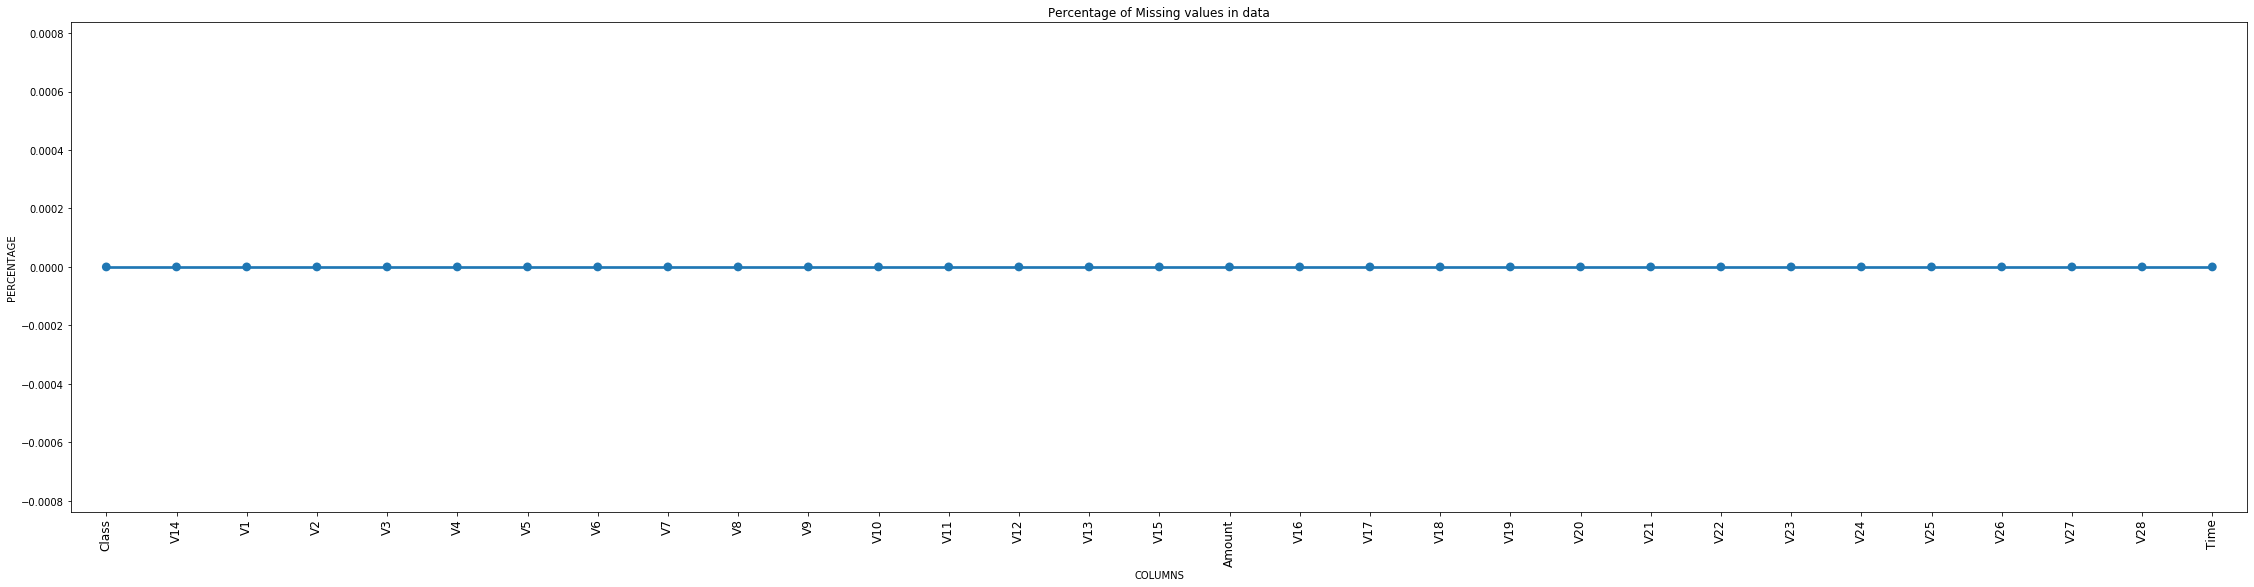

In [6]:
fig = plt.figure(figsize=(39,9))
missing_data = pd.DataFrame((get_null_percentage(df))).reset_index()
ax = sns.pointplot("index",0,data = missing_data)
plt.xticks(rotation =90,fontsize = 12)
plt.title("Percentage of Missing values in data",fontsize=12)
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

There are no missing values

In [7]:
df.shape

(284807, 31)

31 columns and 284807 records

In [8]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'], dtype='object')

### 2.2 Checking Fraud and Non Fraud Cases

In [9]:
fraud_cases=len(df[df['Class']==1])
non_fraud_cases=len(df[df['Class']==0])
print('Number of Fraud Cases:',fraud_cases)
print('Number of Non Fraud Cases:',non_fraud_cases)

Number of Fraud Cases: 492
Number of Non Fraud Cases: 284315


In [10]:
fraud=df[df['Class']==1]
genuine=df[df['Class']==0]

In [12]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [13]:
genuine.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

#### Here we will observe the distribution of our classes

In [14]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

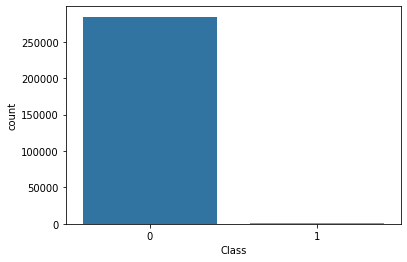

In [15]:
sns.countplot(x="Class", data=df);

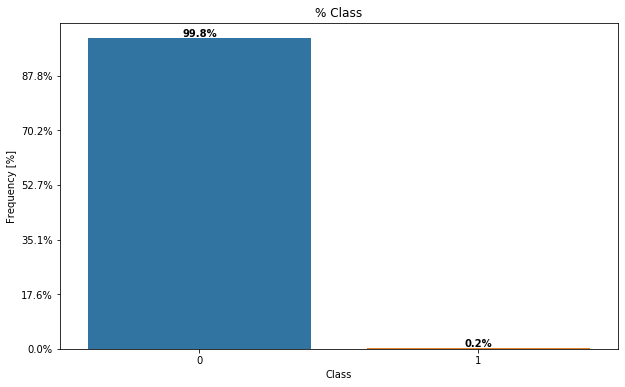

In [17]:
total = len(df)
plt.figure(figsize=(10,6))
ax = sns.countplot(x='Class', data=df)
plt.title('% '+'Class')
#plt.xticks(rotation=90)
    #plt.xlabel('Number of Axles')
plt.ylabel('Frequency [%]')
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/total), (x.mean(), y), 
                ha='center', va='bottom',weight='bold') # set the alignment of the text

    #adjust the ticklabel to the desired format, without changing the position of the ticks. 
_ = ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))

#### Data is imbalanced as non-fraud cases are 99.8% and Fraud cases are 0.2%

### Histogram for Amount and Time

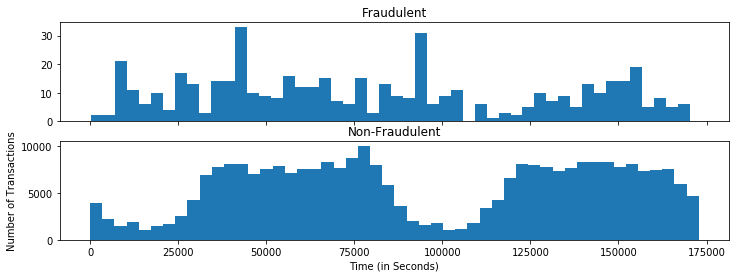

In [18]:
fig, (ax1, ax2) = plt.subplots(2,1, sharex = True, figsize = [12,4])

ax1.hist(df.Time[df.Class == 1], bins = 50)
ax1.set_title("Fraudulent")
ax2.hist(df.Time[df.Class == 0], bins = 50)
ax2.set_title("Non-Fraudulent")

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

#### Observation

- The distribution of fraudulent transactions over time shows some variation, with certain time intervals experiencing higher numbers of frauds compared to others.- 
The bottom histogram shows a more consistent and widespread distribution of non-fraudulent transactions over time, which suggests that legitimate transactions occur regularly throughout the time frame captured by the data
- There seem to be peaks and troughs in the time distribution for fraudulent transactions, which might indicate cyclic patterns or time-based trends in the data..

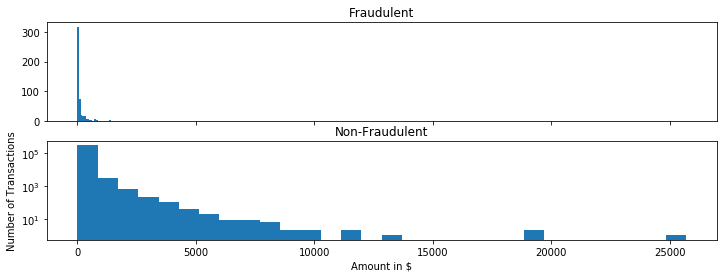

In [19]:
fig, (ax1, ax2) = plt.subplots(2,1, sharex = True, figsize = [12,4])

ax1.hist(df.Amount[df.Class == 1], bins = 30)
ax1.set_title("Fraudulent")
ax2.hist(df.Amount[df.Class == 0], bins = 30)
ax2.set_title("Non-Fraudulent")

plt.xlabel('Amount in $')
plt.ylabel('Number of Transactions')

# Setting the y-axis to a log scale as the transaction amount spans several orders of magnitude. 
plt.yscale('log') 
plt.show()

#### Observation
- This visualization is likely trying to convey that there are differences in the distribution of transaction amounts between fraudulent and non-fraudulent transactions.- 
Fraudulent transactions may be more frequent at lower amounts, which could be a tactic used by fraudsters to avoid detection.

In [20]:
df['Time'].describe()

count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64

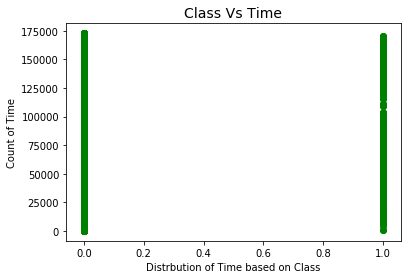

In [21]:
# Create a scatter plot to observe the distribution of classes with time
plt.scatter(df['Class'], df['Time'], color='green')
plt.title('Class Vs Time', fontsize=14)
plt.xlabel('Distrbution of Time based on Class')
plt.ylabel('Count of Time')
plt.show()

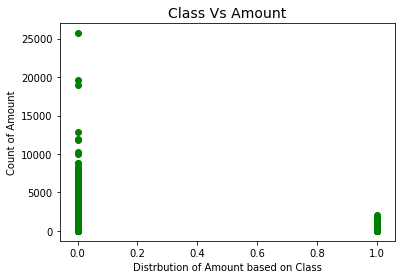

In [22]:
# Create a scatter plot to observe the distribution of classes with Amount
plt.scatter(df['Class'], df['Amount'], color='green')
plt.title('Class Vs Amount', fontsize=14)
plt.xlabel('Distrbution of Amount based on Class')
plt.ylabel('Count of Amount')
plt.show()

#### Time shows no importance as per above plot so lets drop it.

### 2.3 Normalize the Amount

In [6]:
df["Amount_nd"] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))

In [7]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Amount_nd
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.073403


In [8]:
# Drop Amount and Time columns
df = df.drop(['Time','Amount'],1)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   V1         284807 non-null  float64
 1   V2         284807 non-null  float64
 2   V3         284807 non-null  float64
 3   V4         284807 non-null  float64
 4   V5         284807 non-null  float64
 5   V6         284807 non-null  float64
 6   V7         284807 non-null  float64
 7   V8         284807 non-null  float64
 8   V9         284807 non-null  float64
 9   V10        284807 non-null  float64
 10  V11        284807 non-null  float64
 11  V12        284807 non-null  float64
 12  V13        284807 non-null  float64
 13  V14        284807 non-null  float64
 14  V15        284807 non-null  float64
 15  V16        284807 non-null  float64
 16  V17        284807 non-null  float64
 17  V18        284807 non-null  float64
 18  V19        284807 non-null  float64
 19  V20        284807 non-n

### Splitting the data into train & test data

In [9]:
df_copy = df
X = df_copy.drop(columns=['Class'], axis=1)
y= df_copy['Class']#class variable

In [10]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [16]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
350
142


### Plotting the distribution of a variable

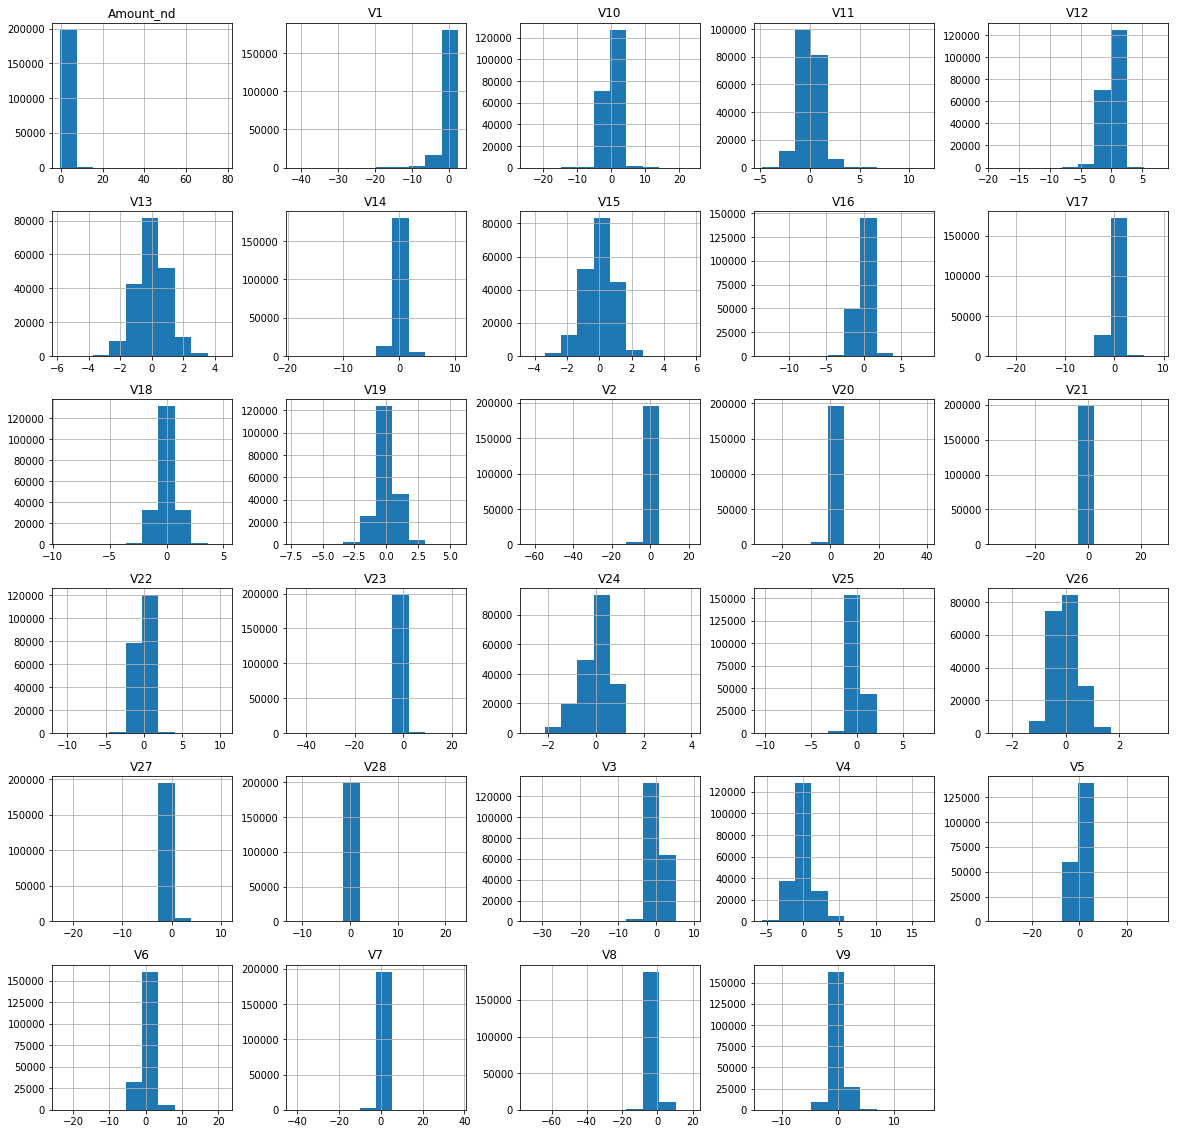

In [30]:
# plot the histogram of a variable from the dataset to see the skewness
X_train.hist(figsize=(20,20))
plt.show()

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [11]:
X_train_pt = X_train
X_test_pt =  X_test

In [12]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
X_train_pt[X_train_pt.columns] = pt.fit_transform(X_train_pt)
X_test_pt[X_test_pt.columns] = pt.fit_transform(X_test_pt)

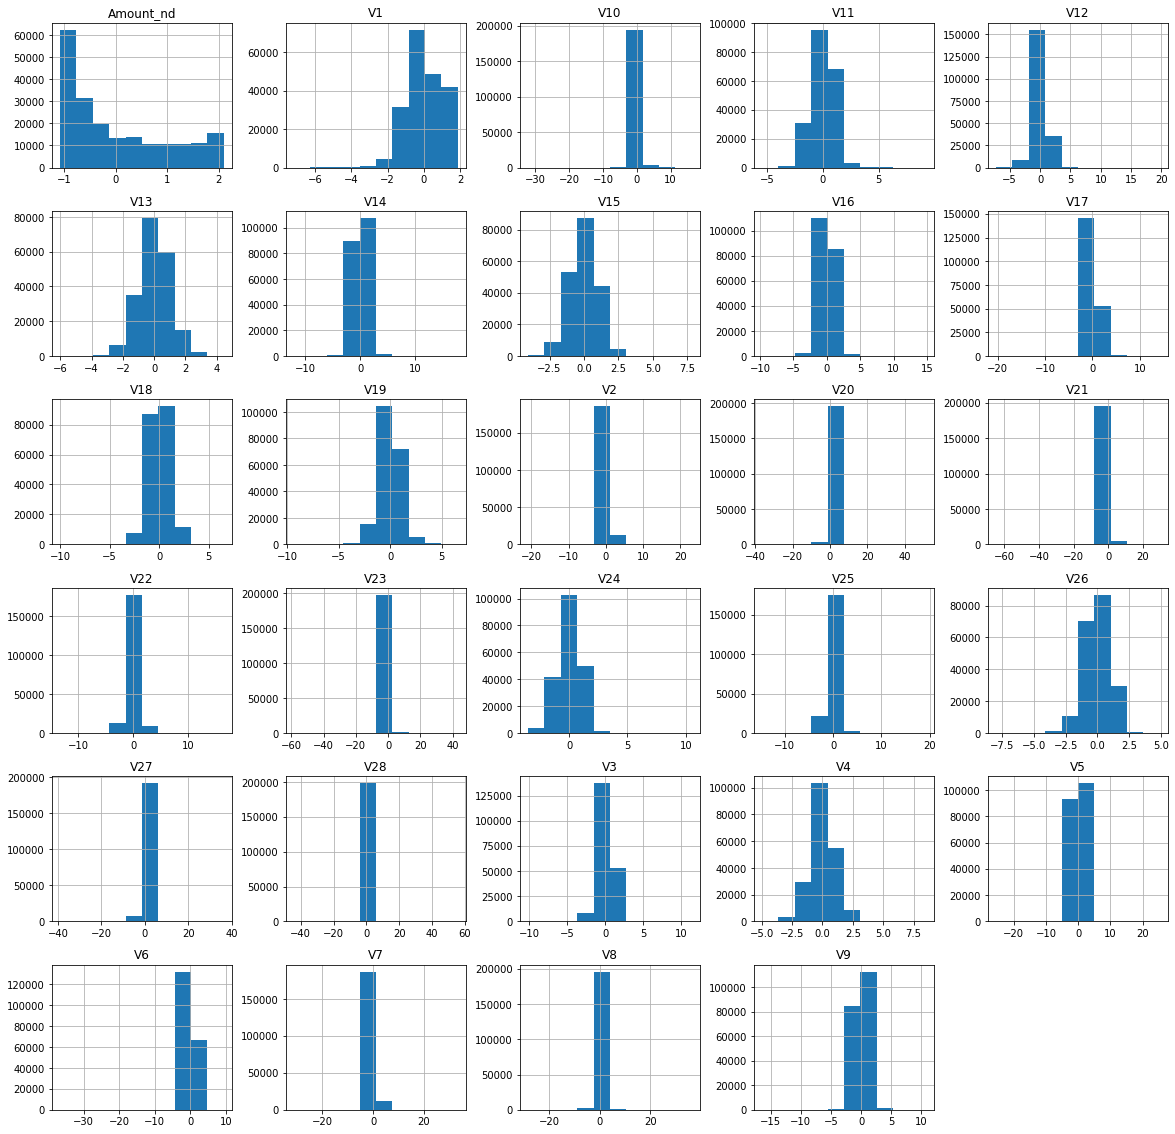

In [17]:
# plot the histogram of a variable from the dataset again to see the result 
X_train_pt.hist(figsize=(20,20))
plt.show()

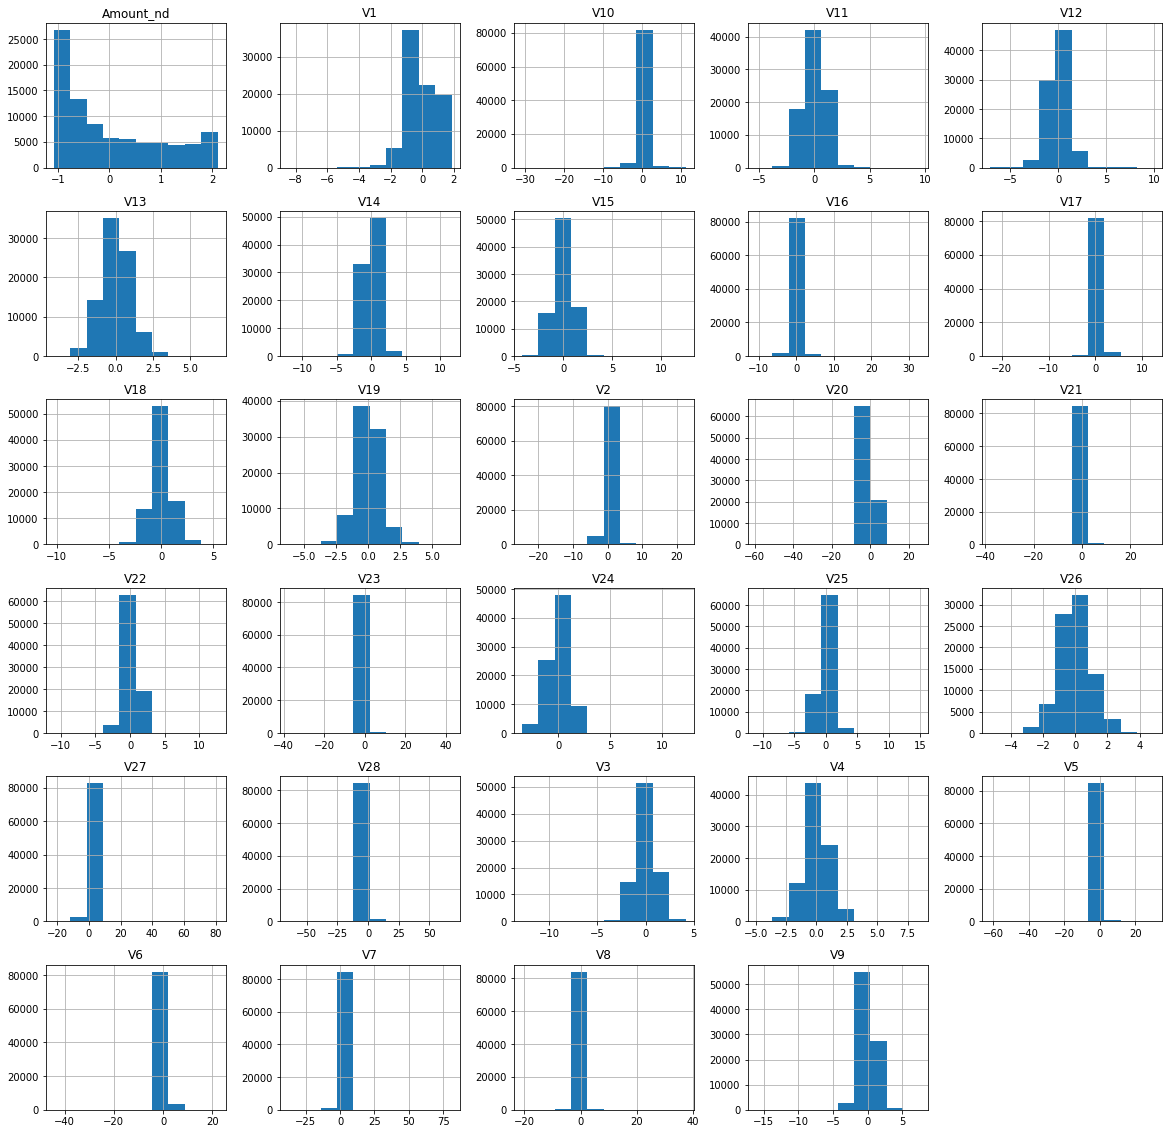

In [19]:
X_test_pt.hist(figsize=(20,20))
plt.show()

## Model Building
- Build different models on the imbalanced dataset and see the result

In [13]:
# Logistic Regression
from sklearn import linear_model #import the package
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold , cross_val_score
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 

#model = LogisticRegression()
#model.fit(X_train_pt, y_train.values.ravel())

In [14]:
X_train_cv= X_train_pt
X_test_cv = X_test_pt
y_train_cv = y_train
y_test_cv = y_test

In [ ]:
lr = LogisticRegression()
lr.fit(X_train_cv,y_train)

### Logistic Regression Hyperparameter Tuning 

In [37]:
#This code is taking long time to execute so commented

#Grid Search
# logreg = LogisticRegression(class_weight='balanced')
# param = {'C':[0.001,0.003,0.005,0.01,0.03,0.05,0.1,0.3,0.5,1,2,3,3,4,5,10,20]}
# clf = GridSearchCV(logreg,param,scoring='roc_auc',refit=True,cv=10)
# clf.fit(X_train_cv,y_train)
# print('Best roc_auc: {:.4}, with best C: {}'.format(clf.best_score_, clf.best_params_))

### Logistic Regression model
Logistic regression is used for modelling. The data set is split using Stratified Kfold. In each split model is created and predicted using that model. The final predicted value is average of all model.

In [22]:
def showMatrics(msg,y,pred):
    print("************"+msg+"*********************")
    print('Confusion matrix\n',confusion_matrix(y,pred))
    #print('Cv',cv_score,'\nMean cv Score',np.mean(cv_score))
    TP = (confusion_matrix(y,pred))[0][0] #True Negatives
    FP = (confusion_matrix(y,pred))[0][1] #False Positives
    FN = (confusion_matrix(y,pred))[1][0] #False Negatives
    TN = (confusion_matrix(y,pred))[1][1] #True Positive
    print("Not-Fradulent Accuracy Rate:(Specificity): ",round((TP/(TP+FP)),3))
    print("Fradulent Accuracy Rate:(Sensitivity): ",round((TN/(TN+FN)),3))
    print(classification_report(y, pred))

In [24]:
# draw roc curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

######################### Logistic Regression #########################
Training Accuracy = 0.999
Test Accuracy = 0.999
ROC_AUC_score : 0.827342
[[85280    21]
 [   49    93]]
--------------- CLASSIFICATION REPORT ---------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.82      0.65      0.73       142

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.91      0.83      0.86     85443
weighted avg       1.00      1.00      1.00     85443



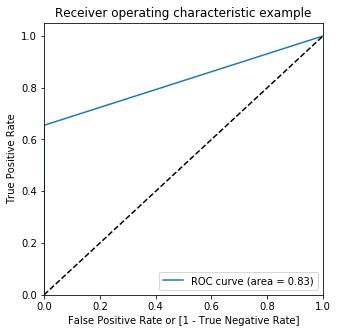

(array([0.00000000e+00, 2.46187032e-04, 1.00000000e+00]),
 array([0.        , 0.65492958, 1.        ]),
 array([2, 1, 0]))

In [141]:
lr = LogisticRegression()
lr.fit(X_train_cv,y_train)

y_pred = lr.predict(X_test_cv)
y_pred_prob = lr.predict_proba(X_test_cv)[:,1]
print("#"*25,"Logistic Regression","#"*25)
print("Training Accuracy = {:.3f}".format(lr.score(X_train_cv, y_train_cv)))
print("Test Accuracy = {:.3f}".format(lr.score(X_test_cv, y_test_cv)))
print("ROC_AUC_score : %.6f" % (roc_auc_score(y_test_cv, y_pred)))
#Confusion Matrix
print(confusion_matrix(y_test, y_pred))
print("-"*15,"CLASSIFICATION REPORT","-"*15)
print(classification_report(y_test_cv, y_pred))

draw_roc(y_test_cv,y_pred)

### Logisitc Regression Hyperparameter Tuning 

In [21]:
skfold = StratifiedKFold(n_splits=5, random_state=100)
model_skfold = LogisticRegression(C=0.001)
results_skfold = model_selection.cross_val_score(model_skfold, X_train_cv, y_train, cv=skfold)
print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))

Accuracy: 99.91%


### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

In [22]:
X_train_ws = X_train_pt
X_test_ws = X_test_pt
y_train_ws = y_train
y_test_ws = y_test

In [23]:
def results(method):
    #print(balancing_technique)
    fig, (ax1, ax2) = plt.subplots(1,2,figsize = (12,6))
    
    if method=="LogisticRegression":
        #model_name = ["RF", "XGB", "KNN","SVM","DT","NBC"]
        model = LogisticRegression(C=0.001)
    if method=="RandomForest":
        #model_name = ["RF", "XGB", "KNN","SVM","DT","NBC"]
        model = RandomForestClassifier(random_state = 0)
    if method=="XGB":
        model = XGBClassifier(random_state = 0)
    if method=="KNN":
        model = KNeighborsClassifier(n_neighbors=5)
    if method=="SVC":
        model = SVC(kernel='linear', C=1.0,probability=True)
    if method=="DecisionTree":
        model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    if method=="NBC":
        model = GaussianNB()

    #for clf,i in zip([RFC, XGBC, KNNC,SVMC,DT,NBC], model_name):
    model_1 = model.fit(X_train_ws, y_train_ws)
    y_pred = model_1.predict(X_test_ws)
    y_pred_prob = model_1.predict_proba(X_test_ws)[:,1]
    print("#"*25,method,"#"*25)
    print("Training Accuracy = {:.3f}".format(model_1.score(X_train_ws, y_train_ws)))
    print("Test Accuracy = {:.3f}".format(model_1.score(X_test_ws, y_test_ws)))
    print("ROC_AUC_score : %.6f" % (roc_auc_score(y_test_ws, y_pred)))
    #Confusion Matrix
    print(confusion_matrix(y_test_ws, y_pred))
    print("-"*15,"CLASSIFICATION REPORT","-"*15)
    print(classification_report(y_test_ws, y_pred))
    
    print("Accuracy Score:  ",round(accuracy_score(y_test_ws,y_pred),3))
    print("AUC Score: ",round(metrics.roc_auc_score(y_test_ws,y_pred),3))
    TP = (confusion_matrix(y_test_ws, y_pred))[0][0]
    FP = (confusion_matrix(y_test_ws, y_pred))[0][1]
    FN = (confusion_matrix(y_test_ws, y_pred))[1][0]
    TN = (confusion_matrix(y_test_ws, y_pred))[1][1]
    print("Not Fraud Accuracy Rate:(Specificity) ==> {}".format(TP/(TP+FP)))
    print("Fraud Accuracy Rate:(Sensitivity) ==> {}".format(TN/(TN+FN)))
        
    #precision-recall curve
    precision, recall, thresholds_pr = precision_recall_curve(y_test_ws, y_pred_prob)
    avg_pre = average_precision_score(y_test_ws, y_pred_prob)
    ax1.plot(precision, recall, label = method+ " average precision = {:0.2f}".format(avg_pre), lw = 3, alpha = 0.7)
    ax1.set_xlabel('Precision', fontsize = 14)
    ax1.set_ylabel('Recall', fontsize = 14)
    ax1.set_title('Precision-Recall Curve', fontsize = 18)
    ax1.legend(loc = 'best')
    #find default threshold
    close_default = np.argmin(np.abs(thresholds_pr - 0.5))
    ax1.plot(precision[close_default], recall[close_default], 'o', markersize = 8)

    #roc-curve
    fpr, tpr, thresholds_roc = roc_curve(y_test_ws, y_pred_prob)
    roc_auc = auc(fpr,tpr)
    ax2.plot(fpr,tpr, label = method+ " area = {:0.2f}".format(roc_auc), lw = 3, alpha = 0.7)
    ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
    ax2.set_xlabel("False Positive Rate", fontsize = 14)
    ax2.set_ylabel("True Positive Rate", fontsize = 14)
    ax2.set_title("ROC Curve", fontsize = 18)
    ax2.legend(loc = 'best')
    #find default threshold
    close_default = np.argmin(np.abs(thresholds_roc - 0.5))
    ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
    plt.tight_layout()

### Without Sampling

### Logistic Regression with Hyperparamter and k-fold

*********LogisticRegression***********
######################### LogisticRegression #########################
Training Accuracy = 0.999
Test Accuracy = 0.999
ROC_AUC_score : 0.760446
[[85281    20]
 [   68    74]]
--------------- CLASSIFICATION REPORT ---------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.79      0.52      0.63       142

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.89      0.76      0.81     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy Score:   0.999
AUC Score:  0.76
Not Fraud Accuracy Rate:(Specificity) ==> 0.9997655361601857
Fraud Accuracy Rate:(Sensitivity) ==> 0.5211267605633803


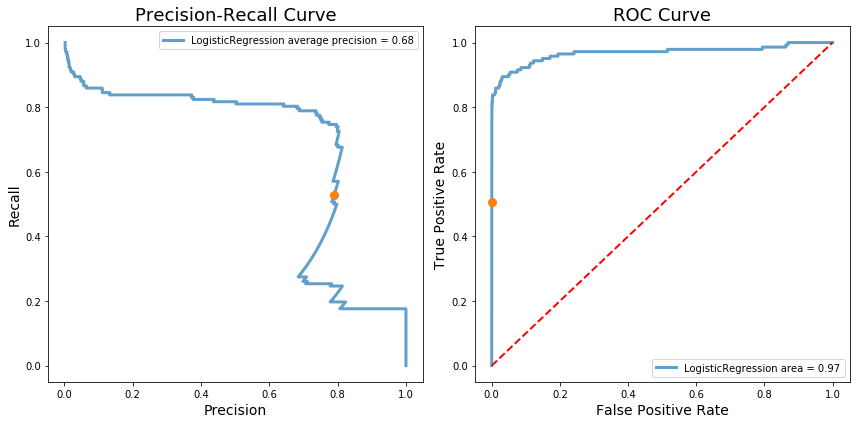

In [25]:
results('LogisticRegression')
# ######################### LogisticRegression #########################
# Training Accuracy = 0.999
# Test Accuracy = 0.999
# ROC_AUC_score : 0.760446
# [[85281    20]
#  [   68    74]]
# --------------- CLASSIFICATION REPORT ---------------
#               precision    recall  f1-score   support

#            0       1.00      1.00      1.00     85301
#            1       0.79      0.52      0.63       142

#    micro avg       1.00      1.00      1.00     85443
#    macro avg       0.89      0.76      0.81     85443
# weighted avg       1.00      1.00      1.00     85443

# Accuracy Score:   0.999
# AUC Score:  0.76
# Not Fraud Accuracy Rate:(Specificity) ==> 0.9997655361601857
# Fraud Accuracy Rate:(Sensitivity) ==> 0.5211267605633803

### Random Forest

*********RandomForest***********
######################### RandomForest #########################
Training Accuracy = 1.000
Test Accuracy = 0.999
ROC_AUC_score : 0.866115
[[85287    14]
 [   38   104]]
--------------- CLASSIFICATION REPORT ---------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.88      0.73      0.80       142

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.94      0.87      0.90     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy Score:   0.999
AUC Score:  0.866
Not Fraud Accuracy Rate:(Specificity) ==> 0.99983587531213
Fraud Accuracy Rate:(Sensitivity) ==> 0.7323943661971831


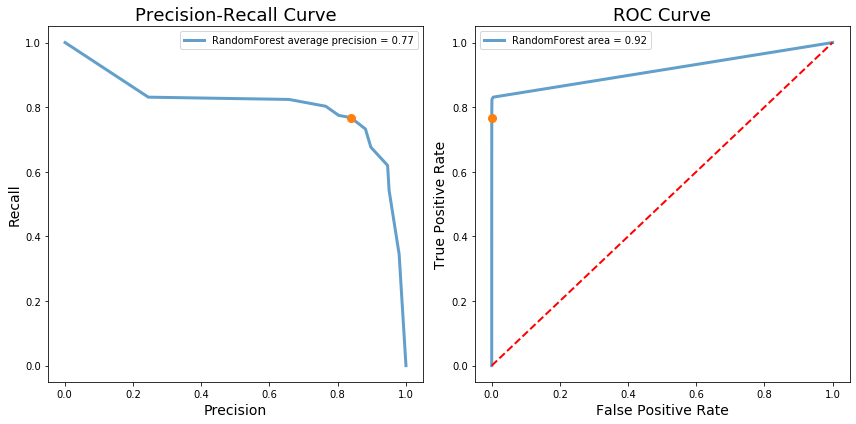

In [26]:
results('RandomForest')

# ######################### RandomForest #########################
# Training Accuracy = 1.000
# Test Accuracy = 0.999
# ROC_AUC_score : 0.866115
# [[85287    14]
#  [   38   104]]
# --------------- CLASSIFICATION REPORT ---------------
#               precision    recall  f1-score   support

#            0       1.00      1.00      1.00     85301
#            1       0.88      0.73      0.80       142

#    micro avg       1.00      1.00      1.00     85443
#    macro avg       0.94      0.87      0.90     85443
# weighted avg       1.00      1.00      1.00     85443

# Accuracy Score:   0.999
# AUC Score:  0.866
# Not Fraud Accuracy Rate:(Specificity) ==> 0.99983587531213
# Fraud Accuracy Rate:(Sensitivity) ==> 0.7323943661971831


### XGBoost

*********XGBoost***********
######################### XGB #########################
Training Accuracy = 1.000
Test Accuracy = 0.999
ROC_AUC_score : 0.887201
[[85280    21]
 [   32   110]]
--------------- CLASSIFICATION REPORT ---------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.84      0.77      0.81       142

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.92      0.89      0.90     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy Score:   0.999
AUC Score:  0.887
Not Fraud Accuracy Rate:(Specificity) ==> 0.999753812968195
Fraud Accuracy Rate:(Sensitivity) ==> 0.7746478873239436


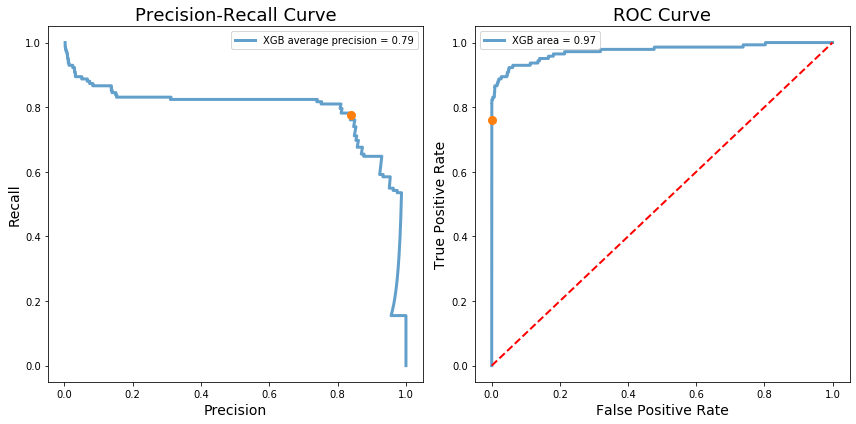

In [24]:
results('XGB')

# ######################### XGB #########################
# Training Accuracy = 1.000
# Test Accuracy = 0.999
# ROC_AUC_score : 0.887201
# [[85280    21]
#  [   32   110]]
# --------------- CLASSIFICATION REPORT ---------------
#               precision    recall  f1-score   support

#            0       1.00      1.00      1.00     85301
#            1       0.84      0.77      0.81       142

#    micro avg       1.00      1.00      1.00     85443
#    macro avg       0.92      0.89      0.90     85443
# weighted avg       1.00      1.00      1.00     85443

# Accuracy Score:   0.999
# AUC Score:  0.887
# Not Fraud Accuracy Rate:(Specificity) ==> 0.999753812968195
# Fraud Accuracy Rate:(Sensitivity) ==> 0.7746478873239436

#### SVC

*********SVC***********
######################### 1 #########################
Training Accuracy = 0.999
Test Accuracy = 0.999
ROC_AUC_score : 0.869537
[[85270    31]
 [   37   105]]
--------------- CLASSIFICATION REPORT ---------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.77      0.74      0.76       142

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.89      0.87      0.88     85443
weighted avg       1.00      1.00      1.00     85443



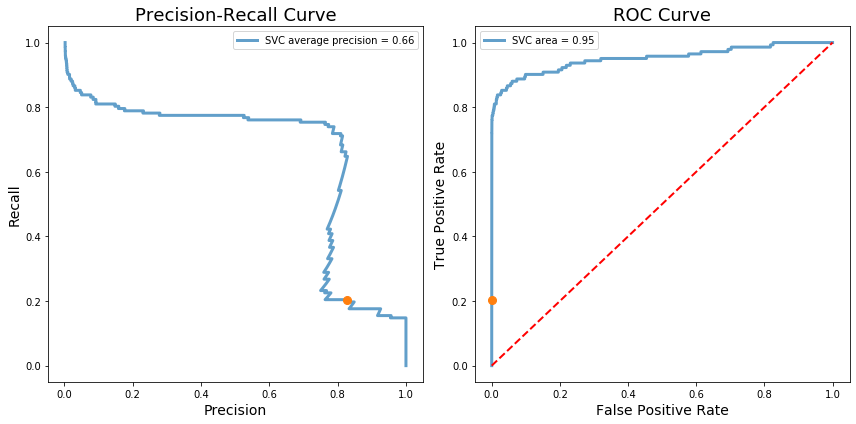

In [250]:
print("*********SVC***********")
results('SVC')

# *********SVC***********
# ######################### 1 #########################
# Training Accuracy = 0.999
# Test Accuracy = 0.999
# ROC_AUC_score : 0.869537
# [[85270    31]
#  [   37   105]]
# --------------- CLASSIFICATION REPORT ---------------
#               precision    recall  f1-score   support

#            0       1.00      1.00      1.00     85301
#            1       0.77      0.74      0.76       142

#    micro avg       1.00      1.00      1.00     85443
#    macro avg       0.89      0.87      0.88     85443
# weighted avg       1.00      1.00      1.00     85443

#### Decision Tree

*********DecisionTree***********
######################### DecisionTree #########################
Training Accuracy = 1.000
Test Accuracy = 0.999
ROC_AUC_score : 0.858891
[[85256    45]
 [   40   102]]
--------------- CLASSIFICATION REPORT ---------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.69      0.72      0.71       142

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.85      0.86      0.85     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy Score:   0.999
AUC Score:  0.859
Not Fraud Accuracy Rate:(Specificity) ==> 0.9994724563604178
Fraud Accuracy Rate:(Sensitivity) ==> 0.7183098591549296


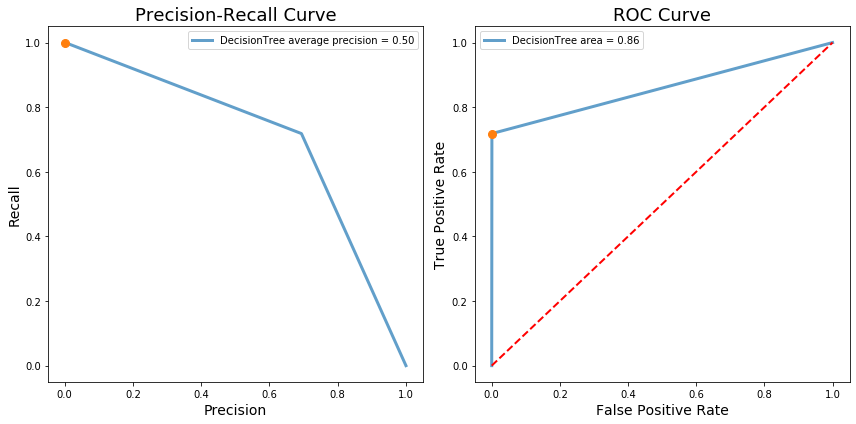

In [27]:
results('DecisionTree')

# ######################### DecisionTree #########################
# Training Accuracy = 1.000
# Test Accuracy = 0.999
# ROC_AUC_score : 0.858891
# [[85256    45]
#  [   40   102]]
# --------------- CLASSIFICATION REPORT ---------------
#               precision    recall  f1-score   support

#            0       1.00      1.00      1.00     85301
#            1       0.69      0.72      0.71       142

#    micro avg       1.00      1.00      1.00     85443
#    macro avg       0.85      0.86      0.85     85443
# weighted avg       1.00      1.00      1.00     85443

# Accuracy Score:   0.999
# AUC Score:  0.859
# Not Fraud Accuracy Rate:(Specificity) ==> 0.9994724563604178
# Fraud Accuracy Rate:(Sensitivity) ==> 0.7183098591549296


#### Naive Bayes

*********Naive Byes***********
######################### NBC #########################
Training Accuracy = 0.978
Test Accuracy = 0.978
ROC_AUC_score : 0.897630
[[83455  1846]
 [   26   116]]
--------------- CLASSIFICATION REPORT ---------------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85301
           1       0.06      0.82      0.11       142

   micro avg       0.98      0.98      0.98     85443
   macro avg       0.53      0.90      0.55     85443
weighted avg       1.00      0.98      0.99     85443

Accuracy Score:   0.978
AUC Score:  0.898
Not Fraud Accuracy Rate:(Specificity) ==> 0.9783589875851397
Fraud Accuracy Rate:(Sensitivity) ==> 0.8169014084507042


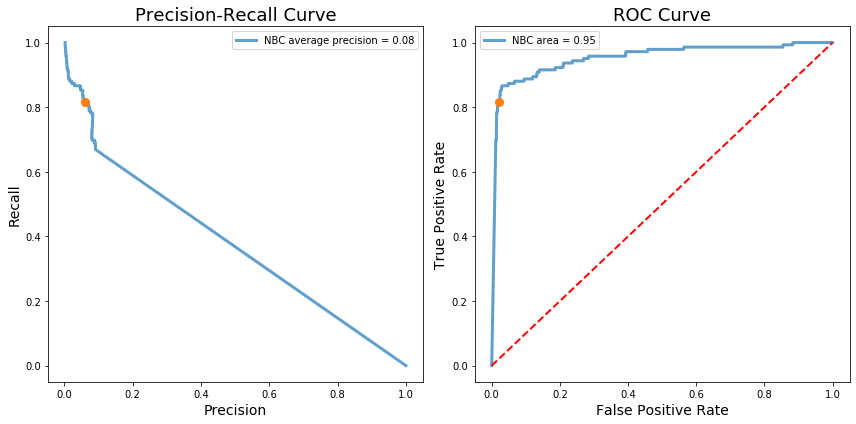

In [28]:
results('NBC')

# ######################### NBC #########################
# Training Accuracy = 0.978
# Test Accuracy = 0.978
# ROC_AUC_score : 0.897630
# [[83455  1846]
#  [   26   116]]
# --------------- CLASSIFICATION REPORT ---------------
#               precision    recall  f1-score   support

#            0       1.00      0.98      0.99     85301
#            1       0.06      0.82      0.11       142

#    micro avg       0.98      0.98      0.98     85443
#    macro avg       0.53      0.90      0.55     85443
# weighted avg       1.00      0.98      0.99     85443

# Accuracy Score:   0.978
# AUC Score:  0.898
# Not Fraud Accuracy Rate:(Specificity) ==> 0.9783589875851397
# Fraud Accuracy Rate:(Sensitivity) ==> 0.8169014084507042

#### KNN

*********KNN***********
######################### KNN #########################
Training Accuracy = 1.000
Test Accuracy = 0.999
ROC_AUC_score : 0.873122
[[85281    20]
 [   36   106]]
--------------- CLASSIFICATION REPORT ---------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.84      0.75      0.79       142

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.92      0.87      0.90     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy Score:   0.999
AUC Score:  0.873
Not Fraud Accuracy Rate:(Specificity) ==> 0.9997655361601857
Fraud Accuracy Rate:(Sensitivity) ==> 0.7464788732394366


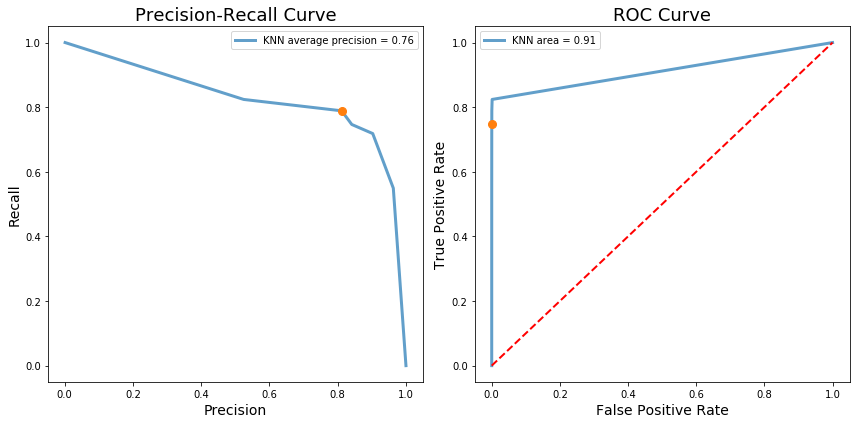

In [29]:
results('KNN')

# ######################### KNN #########################
# Training Accuracy = 1.000
# Test Accuracy = 0.999
# ROC_AUC_score : 0.873122
# [[85281    20]
#  [   36   106]]
# --------------- CLASSIFICATION REPORT ---------------
#               precision    recall  f1-score   support

#            0       1.00      1.00      1.00     85301
#            1       0.84      0.75      0.79       142

#    micro avg       1.00      1.00      1.00     85443
#    macro avg       0.92      0.87      0.90     85443
# weighted avg       1.00      1.00      1.00     85443

# Accuracy Score:   0.999
# AUC Score:  0.873
# Not Fraud Accuracy Rate:(Specificity) ==> 0.9997655361601857
# Fraud Accuracy Rate:(Sensitivity) ==> 0.7464788732394366

From all the models XGB is the best fitted model so lets go ahead for hyperparameter tuning with xgboost

Method for precision-recall

In [20]:
def showPrecisonRecall(X_train,X_test,y_test,model):
    # predict
    y_pred_test = model.predict((X_test))

    y_pred_train = model.predict((X_train))

    pred_probs_test = model.predict_proba(X_test)[:,1]
    
    precision, recall, thresholds = precision_recall_curve(y_test, pred_probs_test)
 
    thresholds = np.append(thresholds, 1)
    f1_scores = 2*(precision*recall)/(precision+recall)
    plt.step(recall, precision, color='b', alpha=0.4, where='post')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve')
    plt.show()
    
    scrs = pd.DataFrame({'precision' : precision, 'recal' : recall, 'thresholds' : thresholds, 'f1_score':f1_scores})
    print("Threshold cutoff: ",scrs.loc[scrs['f1_score'] == scrs.f1_score.max(),'thresholds'].iloc[0])
    print("Max F1-score at cut-off : ",scrs.f1_score.max())
    scrs.plot(x='thresholds', y='f1_score')

Method for show classification report and auc score for training and test data

In [21]:
def showscores(X_train,X_test,y_train,y_test,model,pred_probs_test,y_test_pred):

    y_pred_train = model.predict((X_train)) 

    print("ROC_AUC Score ==> {:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test)))
    TP = (confusion_matrix(y_test,y_test_pred))[0][0]
    FP = (confusion_matrix(y_test,y_test_pred))[0][1]
    FN = (confusion_matrix(y_test,y_test_pred))[1][0]
    TN = (confusion_matrix(y_test,y_test_pred))[1][1]
    #print("AUC Score: ",round(metrics.roc_auc_score(y_test_xg,y_test_pred_xg),3))
    print("Not Fraud Accuracy Rate:(Specificity) ==> {}".format(TP/(TP+FP)))
    print("Fraud Accuracy Rate:(Sensitivity) ==> {}".format(TN/(TN+FN)))

    print("************Training Results*********************")
    print("Accuracy Score:  ",round(accuracy_score(y_train,y_pred_train),3))
    print(classification_report(y_train,y_pred_train))

    print("************Test Results*********************")
    print("Accuracy Score:  ",round(accuracy_score(y_test,y_test_pred),3))
    print(classification_report(y_test,y_test_pred))

    

### RandomForest with hyperparameter tuning

In [15]:
X_train_rf = X_train_pt
X_test_rf = X_test_pt
y_train_rf = y_train
y_test_rf = y_test

In [38]:
def randomforesttuning(parameters):
    n_folds = 5
    
    param = list(parameters.keys())[0]
    # instantiate the model
    if((param == 'max_features') | (param == 'n_estimators')):
        rf = RandomForestClassifier(max_depth=4)
    else:
        rf = RandomForestClassifier()

    # fit tree on training data
    rf = GridSearchCV(rf, parameters, 
                        cv=n_folds, 
                       scoring="accuracy")
    rf.fit(X_train_rf, y_train_rf)
    # scores of GridSearch CV
    scores = rf.cv_results_
    input_param = "param_" + list(parameters.keys())[0]
    # plotting accuracies with max_depth
    plt.figure()
    plt.plot(scores[input_param], 
             scores["mean_train_score"], 
             label="training accuracy")
    plt.plot(scores[input_param], 
             scores["mean_test_score"], 
             label="test accuracy")
    plt.xlabel(param)
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

### the optimal parameters are shown but commenting as this code will take 1-2 hour time to execute.

##### Tuning max_depth

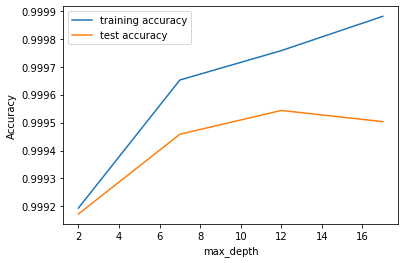

In [39]:
# parameters to build the model on
# parameters = {'max_depth': range(2, 20, 5)}
# randomforesttuning(parameters)

#### You can see that as we increase the value of max_depth, both train and test scores increase till a point, but after that test score starts to decrease. controlling the depth of the constituent trees will help reduce overfitting in the forest.

##### Tuning n_estimators

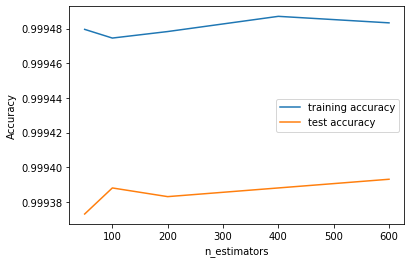

In [40]:
# parameters to build the model on
# parameters = {'n_estimators': [50, 100, 200,400,600]}
# randomforesttuning(parameters)

#### n_estimators means The number of trees in the forest.

#### Tuning max_features

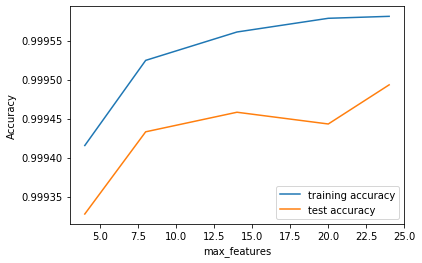

In [41]:
# parameters to build the model on
# parameters = {'max_features': [4, 8, 14, 20,24]}
# randomforesttuning(parameters)

#### Apparently, the training and test scores both seem to increase as we increase max_features, and the model doesn't seem to overfit more with increasing max_features. Think about why that might be the case.

#### Tuning min_samples_leaf

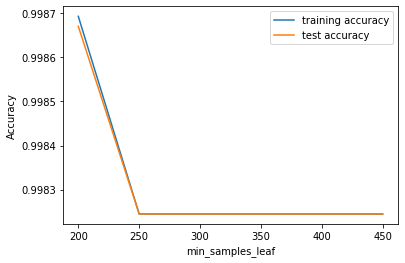

In [42]:
# parameters to build the model on
# parameters = {'min_samples_leaf': range(200, 500, 50)}
# randomforesttuning(parameters)

#### The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches.

#### You can see that the model starts of overfit as you decrease the value of min_samples_leaf.

#### Tuning min_samples_split

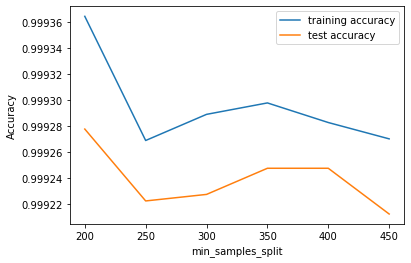

In [43]:
# parameters to build the model on
# parameters = {'min_samples_split': range(200, 500, 50)}
# randomforesttuning(parameters)

#### min_samples_split represents the minimum number of samples required to split an internal node.

### Grid Search to Find Optimal Hyperparameters

We can now find the optimal hyperparameters using GridSearchCV.

#### This code is working and commented because taking long time to execute

In [185]:
# skf = StratifiedKFold(n_splits=10)

# param_grid = {
#     'max_depth': [6,8,12],
#     'max_features': [15,20,25],
#     'min_samples_leaf': [100,150,200]
# }

# rf = RandomForestClassifier()
# # Instantiate the grid search model
# grid_search = RandomizedSearchCV(estimator = rf, cv = skf,param_distributions = param_grid, random_state=42,n_iter=100,
#                           n_jobs = -1,verbose = 2)

In [186]:
# Fit the grid search to the data
#grid_search.fit(X_train_rf, y_train_rf)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 77.5min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed: 233.2min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
          error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'max_depth': [6, 8, 12], 'max_features': [15, 20, 25], 'min_samples_leaf': [100, 150, 200]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [187]:
# printing the optimal accuracy score and hyperparameters
#print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9992225276378884 using {'min_samples_leaf': 150, 'max_features': 15, 'max_depth': 12}


**As this gridsearchcv is taking long time to execute lets go ahead with n_estimators and max_depth analysis.**

In [50]:
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,\
roc_auc_score,roc_curve,recall_score,precision_score,classification_report,f1_score

In [189]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=12,
                             min_samples_leaf=150,
                             max_features=15)
# fit
rfc.fit(X_train_rf, y_train_rf)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features=15, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=150, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#### Finding optimal threshold

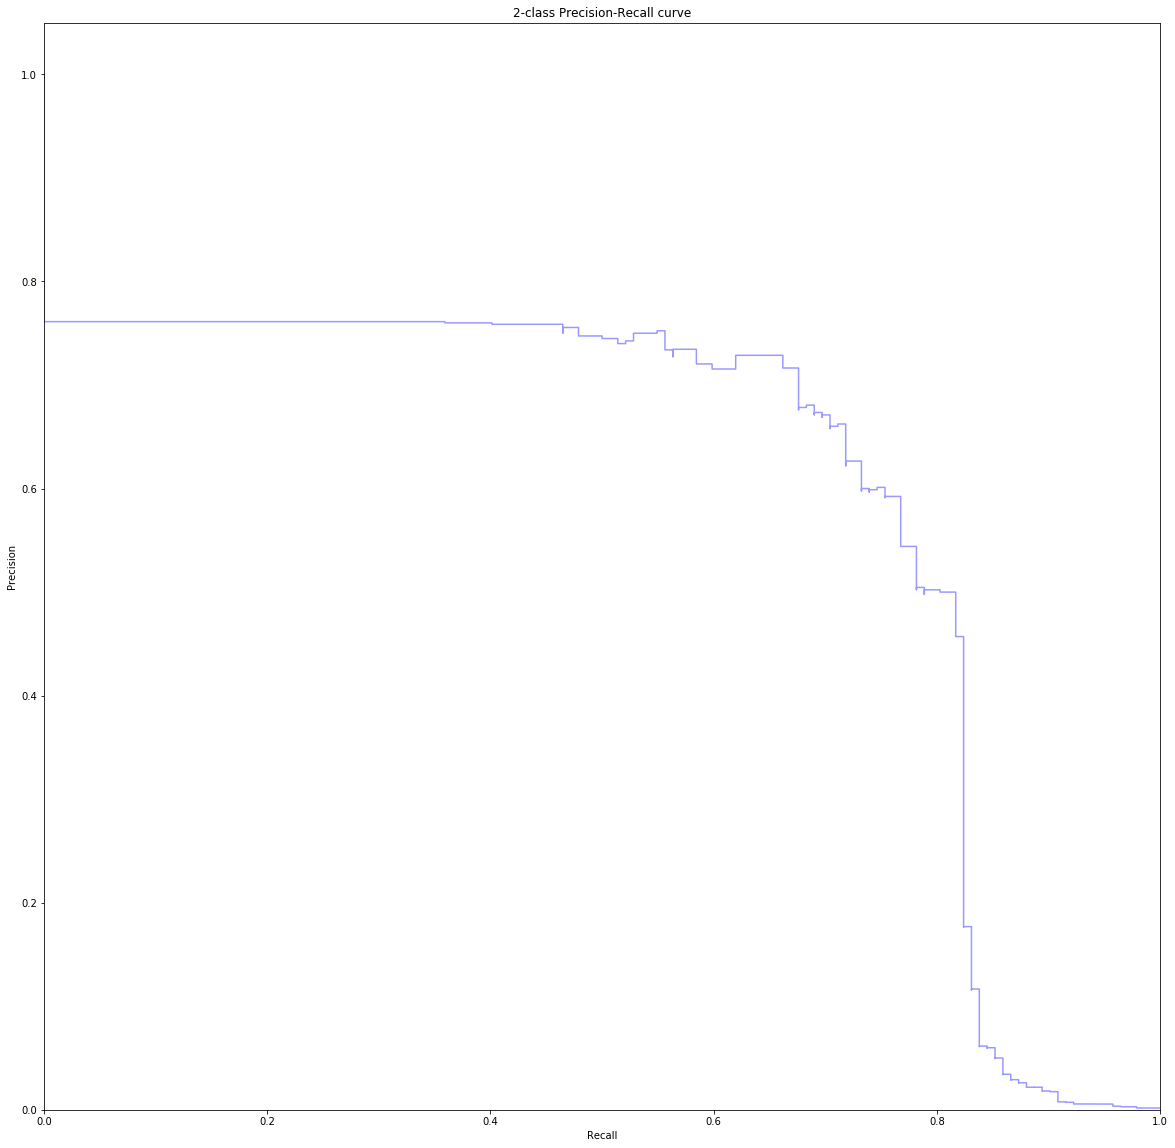

Threshold cutoff:  0.4546858643905799
Max F1-score at cut-off :  0.6956521739130436


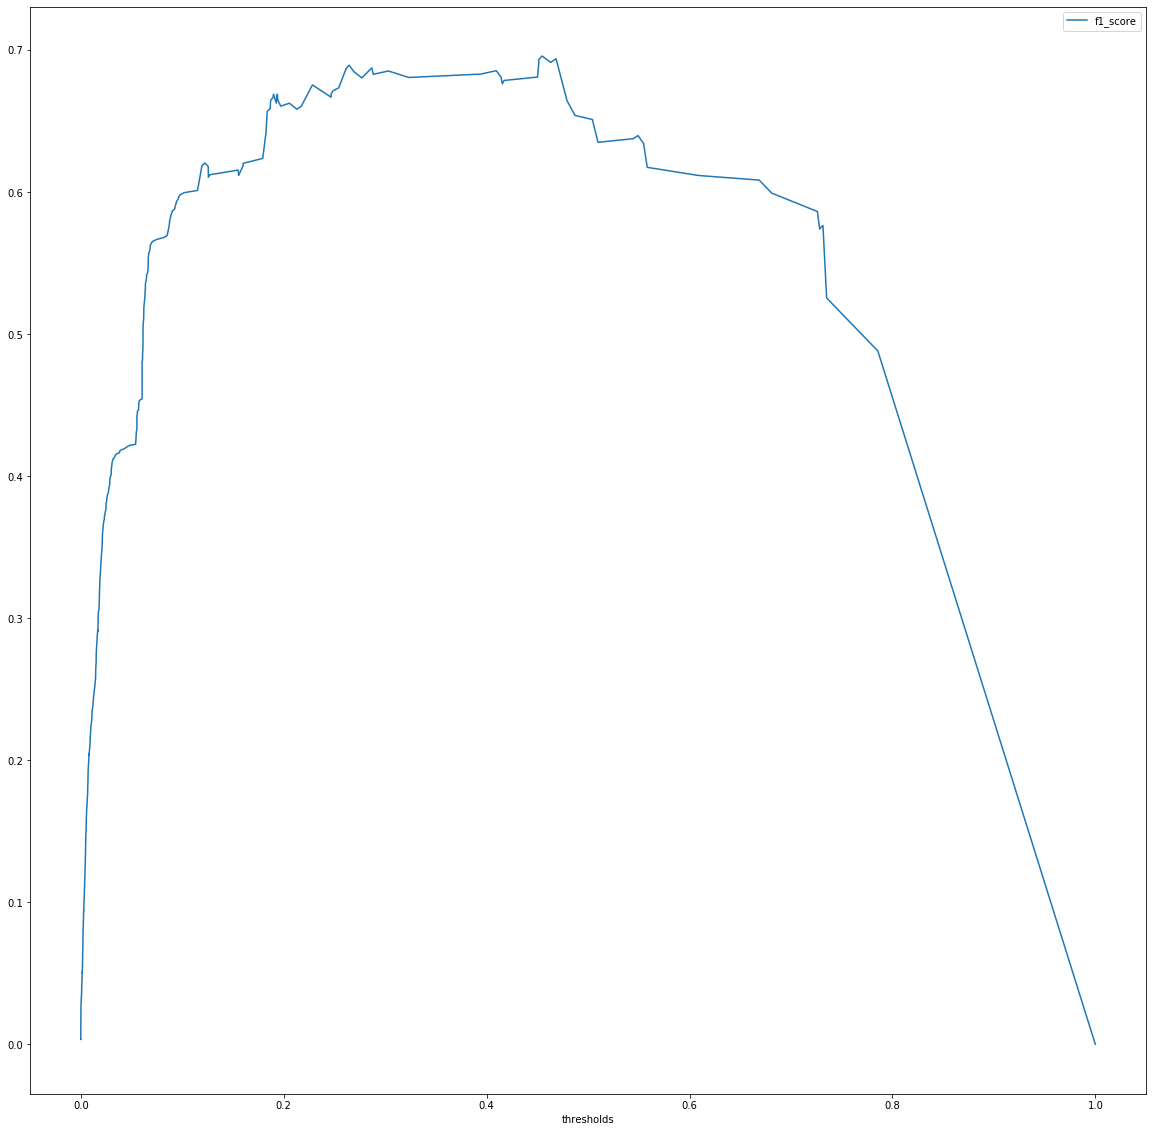

In [190]:
# predict and show Precision Recall
showPrecisonRecall(X_train_rf,X_test_rf,y_test_rf,rfc)

In [215]:
# Threshold
pred_probs_test_rf = (rfc.predict_proba(X_test_rf)[:,1] >= 0.4).astype(bool) # set threshold as 0.4
y_test_pred_rf = (rfc.predict(X_test_rf) >= 0.4).astype(bool)

#showscores
showscores(X_train_rf,X_test_rf,y_train_rf,y_test_rf,rfc,pred_probs_test_rf,y_test_pred_rf)

ROC_AUC Score ==> 0.91
Not Fraud Accuracy Rate:(Specificity) ==> 0.999753812968195
Fraud Accuracy Rate:(Sensitivity) ==> 0.6549295774647887
************Training Results*********************
Accuracy Score:   0.965
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    199014
           1       0.05      0.99      0.09       350

   micro avg       0.97      0.97      0.97    199364
   macro avg       0.52      0.98      0.54    199364
weighted avg       1.00      0.97      0.98    199364

************Test Results*********************
Accuracy Score:   0.963
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     85301
           1       0.04      0.87      0.07       142

   micro avg       0.96      0.96      0.96     85443
   macro avg       0.52      0.91      0.53     85443
weighted avg       1.00      0.96      0.98     85443



In [194]:
# feature importance
#importance = dict(zip(X_train_rf.columns, rfe.feature_importances_))
#importance

NameError: name 'rfe' is not defined

### XGBoost with hyperparameter tuning

In [97]:
X_train_xg = X_train_pt
X_test_xg = X_test_pt
y_train_xg = y_train
y_test_xg = y_test

In [53]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=4, n_estimators=60)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)  

In [54]:
# fit the model
model_cv.fit(X_train_xg, y_train_xg)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  8.9min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
       n_estimators=60, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [0.2, 0.6], 'subsample': [0.3, 0.6, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=1)

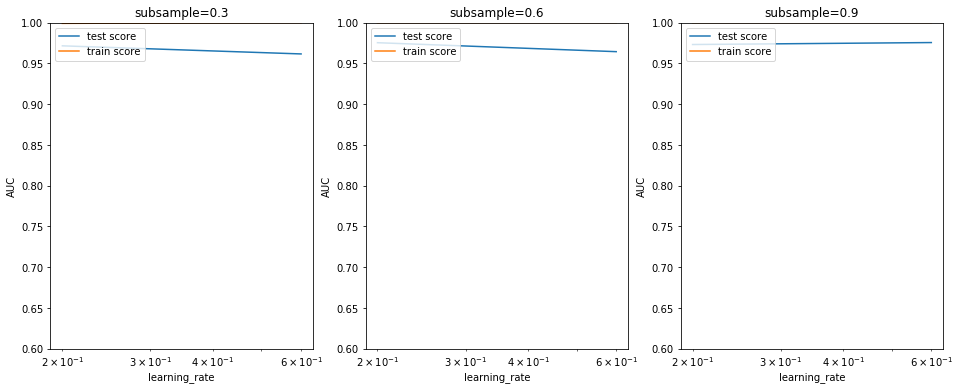

In [55]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
# convert parameters to int for plotting on x-axis
cv_results['param_learning_rate'] = cv_results['param_learning_rate'].astype('float')
#cv_results['param_max_depth'] = cv_results['param_max_depth'].astype('float')

# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

#### The results show that a subsample size of 0.9 and learning_rate of about 0.2 seems optimal. 
Also, XGBoost has resulted in the highest ROC AUC obtained (across various hyperparameters). 


#### Let's build a final model with the chosen hyperparameters.

In [93]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.2,
          'max_depth': 4, 
          'n_estimators':60,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
model = XGBClassifier(params = params)
model.fit(X_train_xg, y_train_xg)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic',
       params={'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 60, 'subsample': 0.9, 'objective': 'binary:logistic'},
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1)

#### Finding optimal threshold

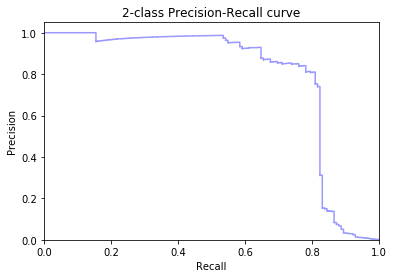

Threshold cutoff:  0.47812747955322266
Max F1-score at cut-off :  0.8102189781021898


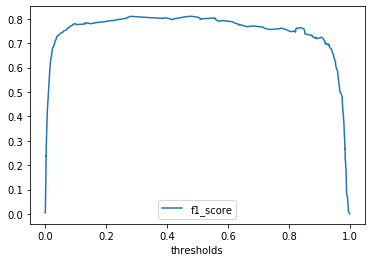

In [94]:
# predict and show Precision Recall
showPrecisonRecall(X_train_xg,X_test_xg,y_test_xg,model)

In [115]:
# Threshold
pred_probs_test_xg = (model.predict_proba(X_test_xg)[:,1] >= 0.6).astype(bool) # set threshold as 0.6
y_test_pred_xg = (model.predict(X_test_xg) >= 0.6).astype(bool)

#showscores
showscores(X_train_xg,X_test_xg,y_train_xg,y_test_xg,model,pred_probs_test_xg,y_test_pred_xg)

ROC_AUC Score ==> 0.87
Not Fraud Accuracy Rate:(Specificity) ==> 0.999753812968195
Fraud Accuracy Rate:(Sensitivity) ==> 0.7746478873239436
************Training Results*********************
Accuracy Score:   1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199014
           1       0.97      0.85      0.91       350

   micro avg       1.00      1.00      1.00    199364
   macro avg       0.99      0.92      0.95    199364
weighted avg       1.00      1.00      1.00    199364

************Test Results*********************
Accuracy Score:   0.999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.84      0.77      0.81       142

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.92      0.89      0.90     85443
weighted avg       1.00      1.00      1.00     85443



#### Finally, let's also look at the feature importances.

In [84]:
# feature importance
importance = dict(zip(X_train_xg.columns, model.feature_importances_))
importance

{'V1': 0.01748485,
 'V2': 0.01840888,
 'V3': 0.021161228,
 'V4': 0.029491695,
 'V5': 0.025623191,
 'V6': 0.011910454,
 'V7': 0.046420407,
 'V8': 0.01738517,
 'V9': 0.031978592,
 'V10': 0.06146261,
 'V11': 0.020065704,
 'V12': 0.03529859,
 'V13': 0.020662291,
 'V14': 0.08888131,
 'V15': 0.018849827,
 'V16': 0.0118474625,
 'V17': 0.2841071,
 'V18': 0.019671598,
 'V19': 0.00931111,
 'V20': 0.02739743,
 'V21': 0.03018772,
 'V22': 0.01837212,
 'V23': 0.013384968,
 'V24': 0.014604812,
 'V25': 0.020663327,
 'V26': 0.019507682,
 'V27': 0.029232256,
 'V28': 0.017780144,
 'Amount_nd': 0.018847616}

### Decision Tree with Hyperparameter Tuning

In [67]:
X_train_dt = X_train_pt
X_test_dt = X_test_pt
y_train_dt = y_train
y_test_dt = y_test

In [68]:
model= DecisionTreeClassifier(random_state=1234)
#Hyper Parameters Set
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
          'random_state':[123]}

#Making models with hyper parameters sets
grid_search = GridSearchCV(model, param_grid=params, n_jobs=-1)

In [69]:
# Fit the grid search to the data
grid_search.fit(X_train_dt, y_train_dt)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1234,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 'random_state': [123]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [70]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9993830380610341 using {'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 15, 'random_state': 123}


In [85]:
dct = DecisionTreeClassifier(max_depth=4,
                             min_samples_leaf=2, 
                             min_samples_split=15,
                             max_features=20)

dct.fit(X_train_dt,y_train_dt)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=20, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=15,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### Finding optimal threshold

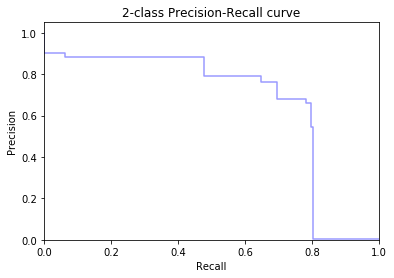

Threshold cutoff:  0.5
Max F1-score at cut-off :  0.7279411764705882


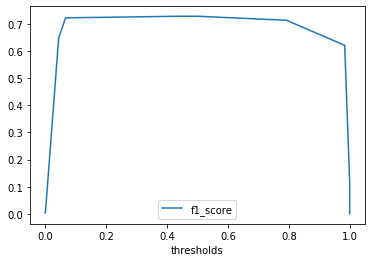

In [196]:
# predict and show Precision Recall
showPrecisonRecall(X_train_dt,X_test_dt,y_test_dt,dct)

In [116]:
# Threshold
pred_probs_test_dt = (dct.predict_proba(X_test_dt)[:,1] >= 0.5).astype(bool) # set threshold as 0.6
y_test_pred_dt = (dct.predict(X_test_dt) >= 0.5).astype(bool)

#showscores
showscores(X_train_dt,X_test_dt,y_train_dt,y_test_dt,dct,pred_probs_test_dt,y_test_pred_dt)

ROC_AUC Score ==> 0.85
Not Fraud Accuracy Rate:(Specificity) ==> 0.999753812968195
Fraud Accuracy Rate:(Sensitivity) ==> 0.7746478873239436
************Training Results*********************
Accuracy Score:   0.999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199014
           1       0.93      0.75      0.83       350

   micro avg       1.00      1.00      1.00    199364
   macro avg       0.97      0.87      0.92    199364
weighted avg       1.00      1.00      1.00    199364

************Test Results*********************
Accuracy Score:   0.999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.79      0.65      0.71       142

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.90      0.82      0.86     85443
weighted avg       1.00      1.00      1.00     85443



In [88]:
# feature importance
importance = dict(zip(X_train_dt.columns, dct.feature_importances_))
importance

{'V1': 0.0,
 'V2': 0.0,
 'V3': 0.0,
 'V4': 0.025857327774800255,
 'V5': 0.0,
 'V6': 0.0,
 'V7': 0.0,
 'V8': 0.0,
 'V9': 0.0017366130812377716,
 'V10': 0.0,
 'V11': 0.02536979647640392,
 'V12': 0.06083541564885404,
 'V13': 0.0,
 'V14': 0.09932899648732613,
 'V15': 0.0,
 'V16': 0.0,
 'V17': 0.7620301765065975,
 'V18': 0.0,
 'V19': 0.0,
 'V20': 0.0,
 'V21': 0.007129253701923481,
 'V22': 0.0,
 'V23': 0.0,
 'V24': 0.0,
 'V25': 0.0,
 'V26': 0.017712420322856696,
 'V27': 0.0,
 'V28': 0.0,
 'Amount_nd': 0.0}

### Decision Tree with KNN Hypperparameter Tuning

### KNN is taking long time so commenting its hyperparameter tuning

In [118]:
#from sklearn.model_selection import RandomizedSearchCV

In [89]:
# X_train_knn = X_train_pt
# X_test_knn = X_test_pt
# y_train_knn = y_train
# y_test_knn = y_test

In [119]:
# knn = KNeighborsClassifier(n_jobs=-1)
# #Hyper Parameters Set
# params = {'n_neighbors':[5,6,7,8,9,10],
#           'leaf_size':[1,2,3,5],
#           'weights':['uniform', 'distance'],
#           'algorithm':['auto', 'ball_tree','kd_tree','brute'],
#           'n_jobs':[-1]}
# #Making models with hyper parameters sets
# model1 = RandomizedSearchCV(estimator = knn, param_distributions = params, n_iter = 100, cv = 3, 
#                             verbose=2, random_state=42, n_jobs = -1)

In [120]:
# Fit the grid search to the data
#model1.fit(X_train_knn,y_train_knn)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


KeyboardInterrupt: 

In [ ]:
# printing the optimal accuracy score and hyperparameters
#print('We can get accuracy of',model1.best_score_,'using',model1.best_params_)

In [ ]:
# knn = KNeighborsClassifier(max_depth=4,
#                              min_samples_leaf=2, 
#                              min_samples_split=15,
#                              max_features=20)

# dct.fit(X_train_dt,y_train_dt)

In [ ]:
# Threshold
# pred_probs_test_knn = (dct.predict_proba(X_test_knn)[:,1] >= 0.5).astype(bool) # set threshold as 0.6
# y_test_pred_knn = (dct.predict(X_test_dt) >= 0.5).astype(bool)

# #showscores
# showscores(X_train_dt,X_test_dt,y_train_dt,y_test_dt,dct,pred_probs_test_dt,y_test_pred_dt)

## Conclusion After Model Building

*********** Model without Hyperparameter Tuning*************

######################### Logistic Regression #########################

Training Accuracy = 0.999

Test Accuracy = 0.999

ROC_AUC_score : 0.827342

--------------- CLASSIFICATION REPORT ---------------
              
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.82      0.65      0.73       142

   micro avg       1.00      1.00      1.00     85443
   
   macro avg       0.91      0.83      0.86     85443

weighted avg       1.00      1.00      1.00     85443

..............................................................................

######################### RandomForest #########################

Training Accuracy = 1.000

Test Accuracy = 0.999

ROC_AUC_score : 0.866115
[[85287    14]
 [   38   104]]

--------------- CLASSIFICATION REPORT ---------------

                    precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.88      0.73      0.80       142

   micro avg       1.00      1.00      1.00     85443
   
   macro avg       0.94      0.87      0.90     85443

weighted avg       1.00      1.00      1.00     85443

Accuracy Score:   0.999

AUC Score:  0.866

Not Fraud Accuracy Rate:(Specificity) ==> 0.99983587531213

Fraud Accuracy Rate:(Sensitivity) ==> 0.7323943661971831

######################### XGB #########################

Training Accuracy = 1.000

Test Accuracy = 0.999

ROC_AUC_score : 0.887201

[[85280    21]
 [   32   110]]
 
--------------- CLASSIFICATION REPORT ---------------

                    precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.84      0.77      0.81       142

   micro avg       1.00      1.00      1.00     85443
   
   macro avg       0.92      0.89      0.90     85443

weighted avg       1.00      1.00      1.00     85443

Accuracy Score:   0.999

AUC Score:  0.887

Not Fraud Accuracy Rate:(Specificity) ==> 0.999753812968195

Fraud Accuracy Rate:(Sensitivity) ==> 0.7746478873239436

*********SVC***********

Training Accuracy = 0.999

Test Accuracy = 0.999

ROC_AUC_score : 0.869537

--------------- CLASSIFICATION REPORT ---------------

                   precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.77      0.74      0.76       142

   micro avg       1.00      1.00      1.00     85443
   
   macro avg       0.89      0.87      0.88     85443

weighted avg       1.00      1.00      1.00     85443

######################### DecisionTree #########################

Training Accuracy = 1.000

Test Accuracy = 0.999

ROC_AUC_score : 0.858891

--------------- CLASSIFICATION REPORT ---------------

                   precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.69      0.72      0.71       142

   micro avg       1.00      1.00      1.00     85443
   
   macro avg       0.85      0.86      0.85     85443

weighted avg       1.00      1.00      1.00     85443

Accuracy Score:   0.999

AUC Score:  0.859

Not Fraud Accuracy Rate:(Specificity) ==> 0.9994724563604178

Fraud Accuracy Rate:(Sensitivity) ==> 0.7183098591549296

*********Naive Byes***********

######################### NBC #########################

Training Accuracy = 0.978

Test Accuracy = 0.978

ROC_AUC_score : 0.897630

--------------- CLASSIFICATION REPORT ---------------

                   precision    recall  f1-score   support

           0       1.00      0.98      0.99     85301
           1       0.06      0.82      0.11       142

   micro avg       0.98      0.98      0.98     85443
   
   macro avg       0.53      0.90      0.55     85443

weighted avg       1.00      0.98      0.99     85443

Accuracy Score:   0.978

AUC Score:  0.898

Not Fraud Accuracy Rate:(Specificity) ==> 0.9783589875851397

Fraud Accuracy Rate:(Sensitivity) ==> 0.8169014084507042


######################### KNN #########################

Training Accuracy = 1.000

Test Accuracy = 0.999

ROC_AUC_score : 0.873122
[[85281    20]
 [   36   106]]
--------------- CLASSIFICATION REPORT ---------------
   
                   precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.84      0.75      0.79       142

   micro avg       1.00      1.00      1.00     85443
   
   macro avg       0.92      0.87      0.90     85443

weighted avg       1.00      1.00      1.00     85443

Accuracy Score:   0.999

AUC Score:  0.873

Not Fraud Accuracy Rate:(Specificity) ==> 0.9997655361601857

Fraud Accuracy Rate:(Sensitivity) ==> 0.7464788732394366


-----------------------------------------------------------------------------------------------------------------

*****Model With Hyperparameter Tuning******

--------------Logistic Regression with Hyperparamter and k-fold------------

Training Accuracy = 0.999

Test Accuracy = 0.999

ROC_AUC_score : 0.760446

--------------- CLASSIFICATION REPORT ---------------

                    precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.79      0.52      0.63       142

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.89      0.76      0.81     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy Score:   0.999
AUC Score:  0.76
Not Fraud Accuracy Rate:(Specificity) ==> 0.9997655361601857
Fraud Accuracy Rate:(Sensitivity) ==> 0.5211267605633803

-------------------------Random Forest with HyperTuning-----------------

ROC_AUC Score ==> 0.84

Not Fraud Accuracy Rate:(Specificity) ==> 0.999753812968195

Fraud Accuracy Rate:(Sensitivity) ==> 0.6549295774647887

************Training Results*********************

Accuracy Score:   0.999

                   precision    recall  f1-score   support

           0       1.00      1.00      1.00    199014
           1       0.86      0.63      0.73       350

   micro avg       1.00      1.00      1.00    199364
   macro avg       0.93      0.82      0.86    199364
weighted avg       1.00      1.00      1.00    199364


************Test Results*********************

Accuracy Score:   0.999

                   precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.73      0.58      0.65       142

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.87      0.79      0.83     85443
weighted avg       1.00      1.00      1.00     85443

--------------XGBoost------------

ROC_AUC Score ==> 0.87

Not Fraud Accuracy Rate:(Specificity) ==> 0.999753812968195

Fraud Accuracy Rate:(Sensitivity) ==> 0.7746478873239436

************Training Results*********************

Accuracy Score:   1.0

                   precision    recall  f1-score   support

           0       1.00      1.00      1.00    199014
           1       0.97      0.85      0.91       350

   micro avg       1.00      1.00      1.00    199364
   macro avg       0.99      0.92      0.95    199364
weighted avg       1.00      1.00      1.00    199364

************Test Results*********************

Accuracy Score:   0.999

                   precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.84      0.77      0.81       142

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.92      0.89      0.90     85443
weighted avg       1.00      1.00      1.00     85443


------------------Decision Tree----------------

ROC_AUC Score ==> 0.85

Not Fraud Accuracy Rate:(Specificity) ==> 0.999753812968195

Fraud Accuracy Rate:(Sensitivity) ==> 0.7746478873239436

************Training Results*********************

Accuracy Score:   0.999

                   precision    recall  f1-score   support

           0       1.00      1.00      1.00    199014
           1       0.93      0.75      0.83       350

   micro avg       1.00      1.00      1.00    199364
   macro avg       0.97      0.87      0.92    199364
weighted avg       1.00      1.00      1.00    199364

************Test Results*********************

Accuracy Score:   0.999

                    precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.79      0.65      0.71       142

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.90      0.82      0.86     85443
weighted avg       1.00      1.00      1.00     85443


...............................................................................

From all above XGBoost and RandomForest performs the best on basis of recall and F1-Score as this is highly imbalance data


#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [ ]:
# clf = ___  #initialise the model with optimum hyperparameters
# clf.fit(X_train, y_train)
# print --> #print the evaluation score on the X_test by choosing the best evaluation metric

### Show the important variable of XGBoost

In [146]:
params = {'learning_rate': 0.2,
          'max_depth': 4, 
          'n_estimators':60,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
model = XGBClassifier(params = params)
model.fit(X_train_xg, y_train_xg)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic',
       params={'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 60, 'subsample': 0.9, 'objective': 'binary:logistic'},
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1)

In [148]:
clf=model

Top var = 17
2nd Top var = 14
3rd Top var = 10


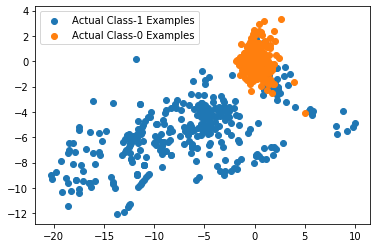

In [195]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train_xg.to_numpy()[np.where(y_train_xg==1.0)]
X_train_0 = X_train_xg.to_numpy()[np.where(y_train_xg==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
#plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model Building and Evaluation with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## RandomForest

### Random Oversampling

In [16]:
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler


print('**********Before Oversampling**********')
print('the shape of train_X: {}'.format(X_train_rf.shape))
print('the shape of train_y: {} \n'.format(y_train_rf.shape))
print("y_train count: '1': Fraud ==> {}".format(sum(y == 1)))
print("y_train count: '0': Not-Fraud ==> {}".format(sum(y == 0)))

oversample = RandomOverSampler(random_state=42)

X_train_over, y_train_over = oversample.fit_sample(X_train_rf, y_train_rf)

print('**********After Oversampling**********')
print('the shape of train_X: {}'.format(X_train_over.shape))
print('the shape of train_y: {} \n'.format(y_train_over.shape))

print("y_train count: '1': Fraud ==> {}".format(sum(y_train_over==1)))
print("y_train count: '0': Not-Fraud ==>{}".format(sum(y_train_over==0)))

**********Before Oversampling**********
the shape of train_X: (199364, 29)
the shape of train_y: (199364,) 

y_train count: '1': Fraud ==> 492
y_train count: '0': Not-Fraud ==> 284315
**********After Oversampling**********
the shape of train_X: (398028, 29)
the shape of train_y: (398028,) 

y_train count: '1': Fraud ==> 199014
y_train count: '0': Not-Fraud ==>199014


Train Test Split

In [17]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_train_over, y_train_over, test_size=0.3, random_state=100)

In [18]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=12,
                             min_samples_leaf=150,
                             max_features=15)
# fit
rfc.fit(X_train_s, y_train_s)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features=15, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=150, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

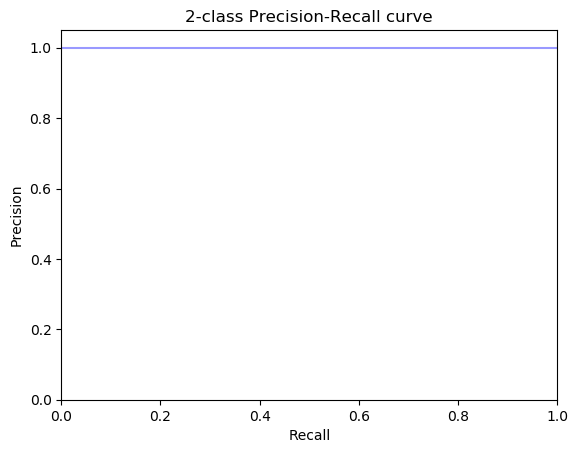

Threshold cutoff:  0.5946887503323628
Max F1-score at cut-off :  0.9992228304015376


In [22]:
# predict and show Precision Recall
plt.rcParams.update(plt.rcParamsDefault)
showPrecisonRecall(X_train_s,X_test_s,y_test_s,rfc)
model = rfc

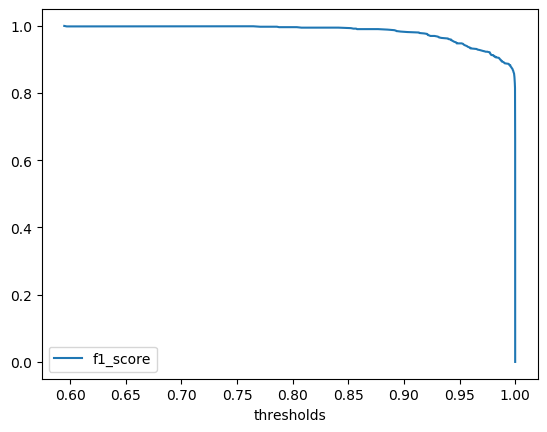

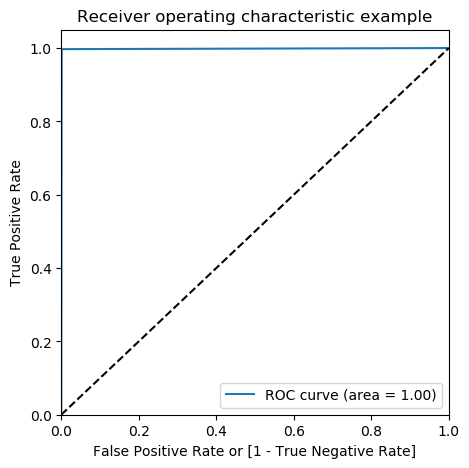

ROC_AUC Score ==> 1.0
Not Fraud Accuracy Rate:(Specificity) ==> 0.9979873538735052
Fraud Accuracy Rate:(Sensitivity) ==> 1.0
************Training Results*********************
Accuracy Score:   0.999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    139391
           1       1.00      1.00      1.00    139228

   micro avg       1.00      1.00      1.00    278619
   macro avg       1.00      1.00      1.00    278619
weighted avg       1.00      1.00      1.00    278619

************Test Results*********************
Accuracy Score:   0.999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     59623
           1       1.00      1.00      1.00     59786

   micro avg       1.00      1.00      1.00    119409
   macro avg       1.00      1.00      1.00    119409
weighted avg       1.00      1.00      1.00    119409



In [25]:
# Threshold
pred_probs_test = (model.predict_proba(X_test_s)[:,1] >= 0.7).astype(bool) # set threshold as 0.7
y_test_pred = (model.predict(X_test_s) >= 0.7).astype(bool)

#showscores
#showscores(X_train_s,X_test_s,y_train_s,y_test_s,model,pred_probs_test_s,y_test_pred_s)

y_pred_train = model.predict((X_train_s)) 

#roc-curve
draw_roc(y_test_s, pred_probs_test)

print("ROC_AUC Score ==> {:2.2}".format(metrics.roc_auc_score(y_test_s, pred_probs_test)))
TN = (confusion_matrix(y_test_s,y_test_pred))[0][0]
FP = (confusion_matrix(y_test_s,y_test_pred))[0][1]
FN = (confusion_matrix(y_test_s,y_test_pred))[1][0]
TP = (confusion_matrix(y_test_s,y_test_pred))[1][1]
print("Not Fraud Accuracy Rate:(Specificity) ==> {}".format(TN/(TN+FP)))
print("Fraud Accuracy Rate:(Sensitivity) ==> {}".format(TP/(TP+FN)))

print("************Training Results*********************")
print("Accuracy Score:  ",round(accuracy_score(y_train_s,y_pred_train),3))
print(classification_report(y_train_s,y_pred_train))

print("************Test Results*********************")
print("Accuracy Score:  ",round(accuracy_score(y_test_s,y_test_pred),3))
print(classification_report(y_test_s,y_test_pred))


### Print the class distribution after applying SMOTE 

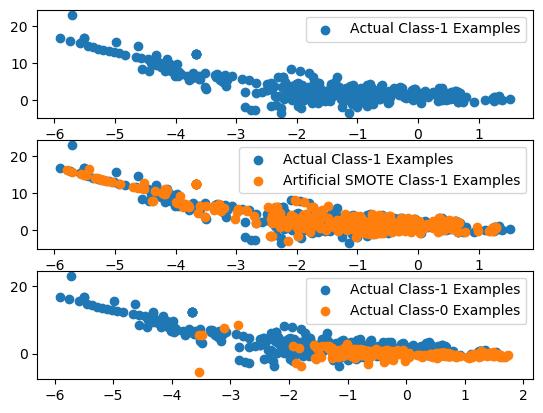

In [244]:
import warnings
warnings.filterwarnings("ignore")


sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_sample(X_train_rf, y_train_rf)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train_rf.shape[0]:]

X_train_1 = X_train_rf.to_numpy()[np.where(y_train_rf==1.0)]
X_train_0 = X_train_rf.to_numpy()[np.where(y_train_rf==0.0)]


#plt.rcParams['figure.figsize'] = [20, 10]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [245]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_train_smote, y_train_smote, test_size=0.3, random_state=100)

In [246]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=12,
                             min_samples_leaf=150,
                             max_features=15)
# fit
rfc.fit(X_train_s, y_train_s)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features=15, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=150, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

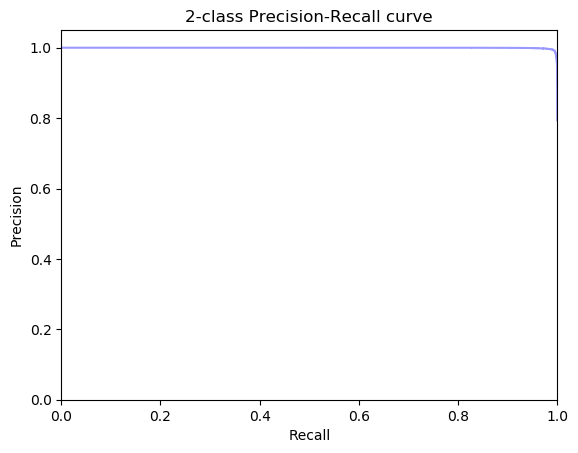

Threshold cutoff:  0.41227532784780446
Max F1-score at cut-off :  0.9929333934746656


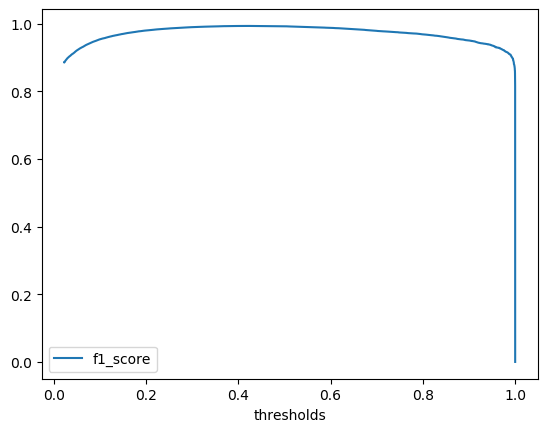

In [247]:
# predict and show Precision Recall
showPrecisonRecall(X_train_s,X_test_s,y_test_s,rfc)
model = rfc

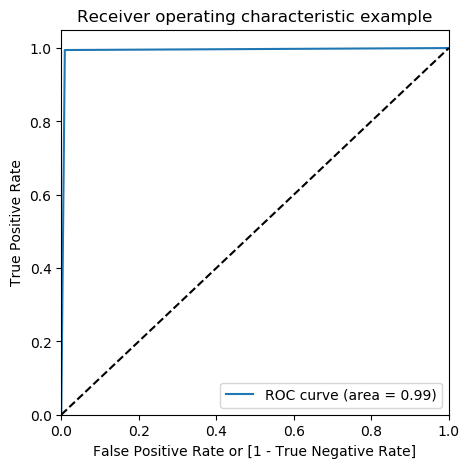

ROC_AUC Score ==> 0.99
Not Fraud Accuracy Rate:(Specificity) ==> 0.9950690169900878
Fraud Accuracy Rate:(Sensitivity) ==> 0.9886093734319071
************Training Results*********************
Accuracy Score:   0.992
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    139391
           1       1.00      0.99      0.99    139228

   micro avg       0.99      0.99      0.99    278619
   macro avg       0.99      0.99      0.99    278619
weighted avg       0.99      0.99      0.99    278619

************Test Results*********************
Accuracy Score:   0.992
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     59623
           1       1.00      0.99      0.99     59786

   micro avg       0.99      0.99      0.99    119409
   macro avg       0.99      0.99      0.99    119409
weighted avg       0.99      0.99      0.99    119409



In [248]:
# Threshold
pred_probs_test = (model.predict_proba(X_test_s)[:,1] >= 0.4).astype(bool) # set threshold as 0.7
y_test_pred = (model.predict(X_test_s) >= 0.4).astype(bool)

#showscores
#showscores(X_train_s,X_test_s,y_train_s,y_test_s,model,pred_probs_test_s,y_test_pred_s)

y_pred_train = model.predict((X_train_s)) 

#roc-curve
draw_roc(y_test_s, pred_probs_test)
print("ROC_AUC Score ==> {:2.2}".format(metrics.roc_auc_score(y_test_s, pred_probs_test)))
TN = (confusion_matrix(y_test_s,y_test_pred))[0][0]
FP = (confusion_matrix(y_test_s,y_test_pred))[0][1]
FN = (confusion_matrix(y_test_s,y_test_pred))[1][0]
TP = (confusion_matrix(y_test_s,y_test_pred))[1][1]
print("Not Fraud Accuracy Rate:(Specificity) ==> {}".format(TN/(TN+FP)))
print("Fraud Accuracy Rate:(Sensitivity) ==> {}".format(TP/(TP+FN)))

print("************Training Results*********************")
print("Accuracy Score:  ",round(accuracy_score(y_train_s,y_pred_train),3))
print(classification_report(y_train_s,y_pred_train))

print("************Test Results*********************")
print("Accuracy Score:  ",round(accuracy_score(y_test_s,y_test_pred),3))
print(classification_report(y_test_s,y_test_pred))



### Print the class distribution after applying ADASYN

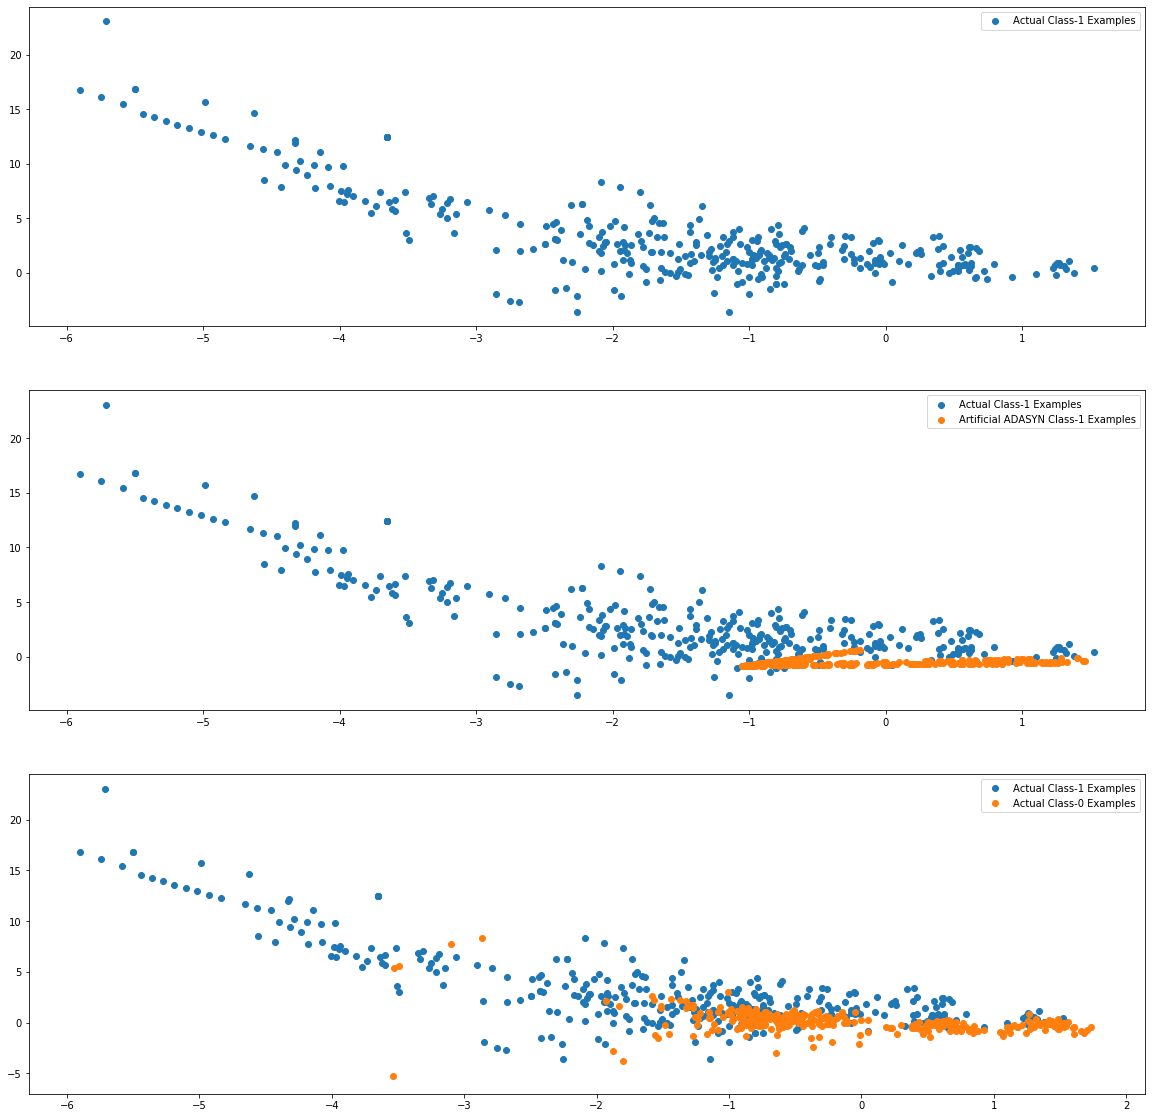

In [26]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_sample(X_train_rf, y_train_rf)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train_rf.shape[0]:]

X_train_1 = X_train_rf.to_numpy()[np.where(y_train_rf==1.0)]
X_train_0 = X_train_rf.to_numpy()[np.where(y_train_rf==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [27]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_train_adasyn, y_train_adasyn, test_size=0.3, random_state=100)

In [28]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=12,
                             min_samples_leaf=150,
                             max_features=15)
# fit
rfc.fit(X_train_s, y_train_s)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features=15, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=150, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

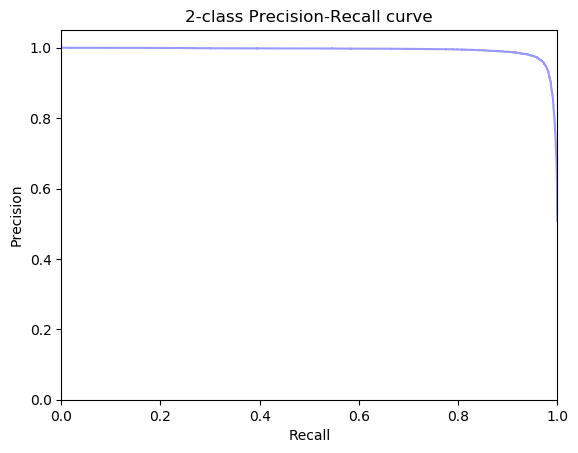

Threshold cutoff:  0.526622777011633
Max F1-score at cut-off :  0.9658507864412482


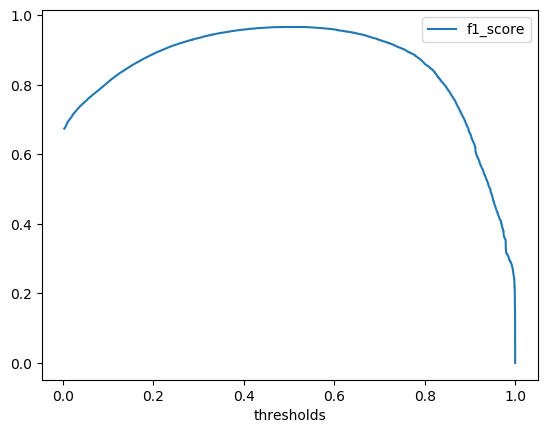

In [29]:
# predict and show Precision Recall
plt.rcParams.update(plt.rcParamsDefault)
showPrecisonRecall(X_train_s,X_test_s,y_test_s,rfc)
model = rfc

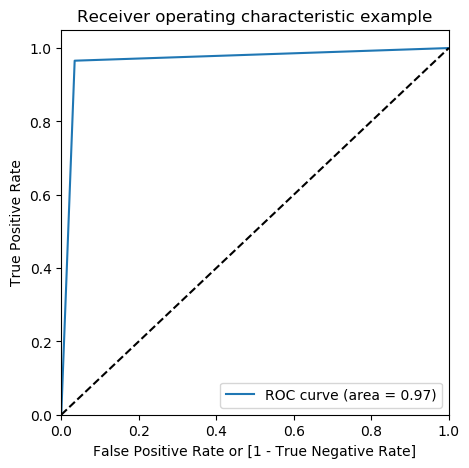

ROC_AUC Score ==> 0.97
Not Fraud Accuracy Rate:(Specificity) ==> 0.9654507337526206
Fraud Accuracy Rate:(Sensitivity) ==> 0.9655362789219213
************Training Results*********************
Accuracy Score:   0.967
              precision    recall  f1-score   support

           0       0.97      0.97      0.97    139389
           1       0.97      0.97      0.97    139204

   micro avg       0.97      0.97      0.97    278593
   macro avg       0.97      0.97      0.97    278593
weighted avg       0.97      0.97      0.97    278593

************Test Results*********************
Accuracy Score:   0.965
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     59625
           1       0.97      0.97      0.97     59773

   micro avg       0.97      0.97      0.97    119398
   macro avg       0.97      0.97      0.97    119398
weighted avg       0.97      0.97      0.97    119398



In [31]:
# Threshold
pred_probs_test = (model.predict_proba(X_test_s)[:,1] >= 0.5).astype(bool) # set threshold as 0.5
y_test_pred = (model.predict(X_test_s) >= 0.5).astype(bool)

#showscores
#showscores(X_train_s,X_test_s,y_train_s,y_test_s,model,pred_probs_test_s,y_test_pred_s)

y_pred_train = model.predict((X_train_s)) 

#roc-curve
draw_roc(y_test_s, pred_probs_test)

print("ROC_AUC Score ==> {:2.2}".format(metrics.roc_auc_score(y_test_s, pred_probs_test)))
TN = (confusion_matrix(y_test_s,y_test_pred))[0][0]
FP = (confusion_matrix(y_test_s,y_test_pred))[0][1]
FN = (confusion_matrix(y_test_s,y_test_pred))[1][0]
TP = (confusion_matrix(y_test_s,y_test_pred))[1][1]
print("Not Fraud Accuracy Rate:(Specificity) ==> {}".format(TN/(TN+FP)))
print("Fraud Accuracy Rate:(Sensitivity) ==> {}".format(TP/(TP+FN)))

print("************Training Results*********************")
print("Accuracy Score:  ",round(accuracy_score(y_train_s,y_pred_train),3))
print(classification_report(y_train_s,y_pred_train))

print("************Test Results*********************")
print("Accuracy Score:  ",round(accuracy_score(y_test_s,y_test_pred),3))
print(classification_report(y_test_s,y_test_pred))




In [32]:
importance = dict(zip(X_train_rf.columns, model.feature_importances_))
importance

{'V1': 0.05034083710262366,
 'V2': 0.02035747549995756,
 'V3': 0.02925378055298865,
 'V4': 0.1099219471557773,
 'V5': 0.012818477779914758,
 'V6': 0.018169736681527986,
 'V7': 0.026354720926787718,
 'V8': 0.02856209377616269,
 'V9': 0.034783975445453946,
 'V10': 0.027721647931387643,
 'V11': 0.0627763033967898,
 'V12': 0.0416977240937708,
 'V13': 0.01225337935366759,
 'V14': 0.18738379145005463,
 'V15': 0.028881734690869652,
 'V16': 0.018183673345863564,
 'V17': 0.09456248703615652,
 'V18': 0.018246572591228485,
 'V19': 0.00793919812140713,
 'V20': 0.011044811058138418,
 'V21': 0.010580178353775886,
 'V22': 0.0170948818310182,
 'V23': 0.013503563248772476,
 'V24': 0.015413274653622761,
 'V25': 0.033606335833956,
 'V26': 0.017531826556394983,
 'V27': 0.014021405496726546,
 'V28': 0.01542661736839811,
 'Amount_nd': 0.021567548666806553}

## Cost-Benefit Analysis

#### After finding the best evaluation score on the test data, you have to find how much cost you are saving from the final predictive model.

In [56]:
y_test_pred_final = pd.DataFrame({'Fraud':y_test_s,'Fraud_Predicted':y_test_pred})
y_test_pred_final

,Fraud,Fraud_Predicted
0,1,True
1,0,False
2,1,True
3,1,True
4,0,False
...,...,...
119393,1,True
119394,0,False
119395,0,False
119396,1,True


In [57]:
y_test_pred_final['Fraud_Predicted'] = y_test_pred_final.Fraud_Predicted.map(lambda x: 1 if x == True else 0)
y_test_pred_final.head()

,Fraud,Fraud_Predicted
0,1,1
1,0,0
2,1,1
3,1,1
4,0,0


In [70]:
X_test_rf['Amount_nd']

49089    -0.801993
154704   -0.685901
67247     1.812240
251657   -0.825956
201903   -0.221241
            ...   
227071   -0.790105
161101    0.597859
45955     2.089369
32565    -0.830537
283008    0.330936
Name: Amount_nd, Length: 85443, dtype: float64

In [71]:
y_test_pred_final['amount']=X_test_rf['Amount_nd']

In [74]:
y_test_pred_final.shape

(119398, 3)

In [78]:
y_test_pred_final = y_test_pred_final.fillna(0)

In [79]:
y_test_pred_final.head()

,Fraud,Fraud_Predicted,amount
0,1,1,0.000000
1,0,0,0.000000
2,1,1,0.000000
3,1,1,0.779566
4,0,0,0.330829


### 1. From your confusion matrix, find total fraud predictions that the model has made (TP + FP).

In [ ]:
Total_Fraud_Predictions = TP + FP
print(Total_Fraud_Predictions)

#### Cost of each transaction which is correctly predicted

In [82]:
total_predicted_correctly = y_test_pred_final[['amount']].sum(axis=1).where(y_test_pred_final['Fraud'] == y_test_pred_final['Fraud_Predicted'], 0)

In [85]:
total_predicted_correctly.sum()

1628.733561953743

### 2. The savings will be the total amount of correct predictions made: TP x Cost of each transaction which is correctly predicted.

In [88]:
TP*total_predicted_correctly.sum()

93999100.06103636

#### Cost of each transaction which is incorrectly predicted

In [86]:
total_predicted_incorrectly = y_test_pred_final[['amount']].sum(axis=1).where(y_test_pred_final['Fraud'] != y_test_pred_final['Fraud_Predicted'], 0)

In [87]:
total_predicted_incorrectly.sum()

23.92538880620403

### 3. The loss will be the total amount of incorrect predictions made: FN x Cost of each transaction which is incorrectly predicted.

In [89]:
FN*total_predicted_incorrectly.sum()

49286.300940780304

### 4. So the total savings= (TP x cost of each transaction (correct predictions) -[ (TP+FP) x 10 + FN x Cost of all transactions (incorrect predictions)] )

In [91]:
total_savings = (TP*(total_predicted_correctly.sum())  - [(TP+FP)*10+FN*(total_predicted_incorrectly.sum())])

In [94]:
round(total_savings[0],3)

93352083.76

In [254]:
clf= model

### Print the important features of the randomforest model to understand the dataset

Top var = 14
2nd Top var = 17
3rd Top var = 4


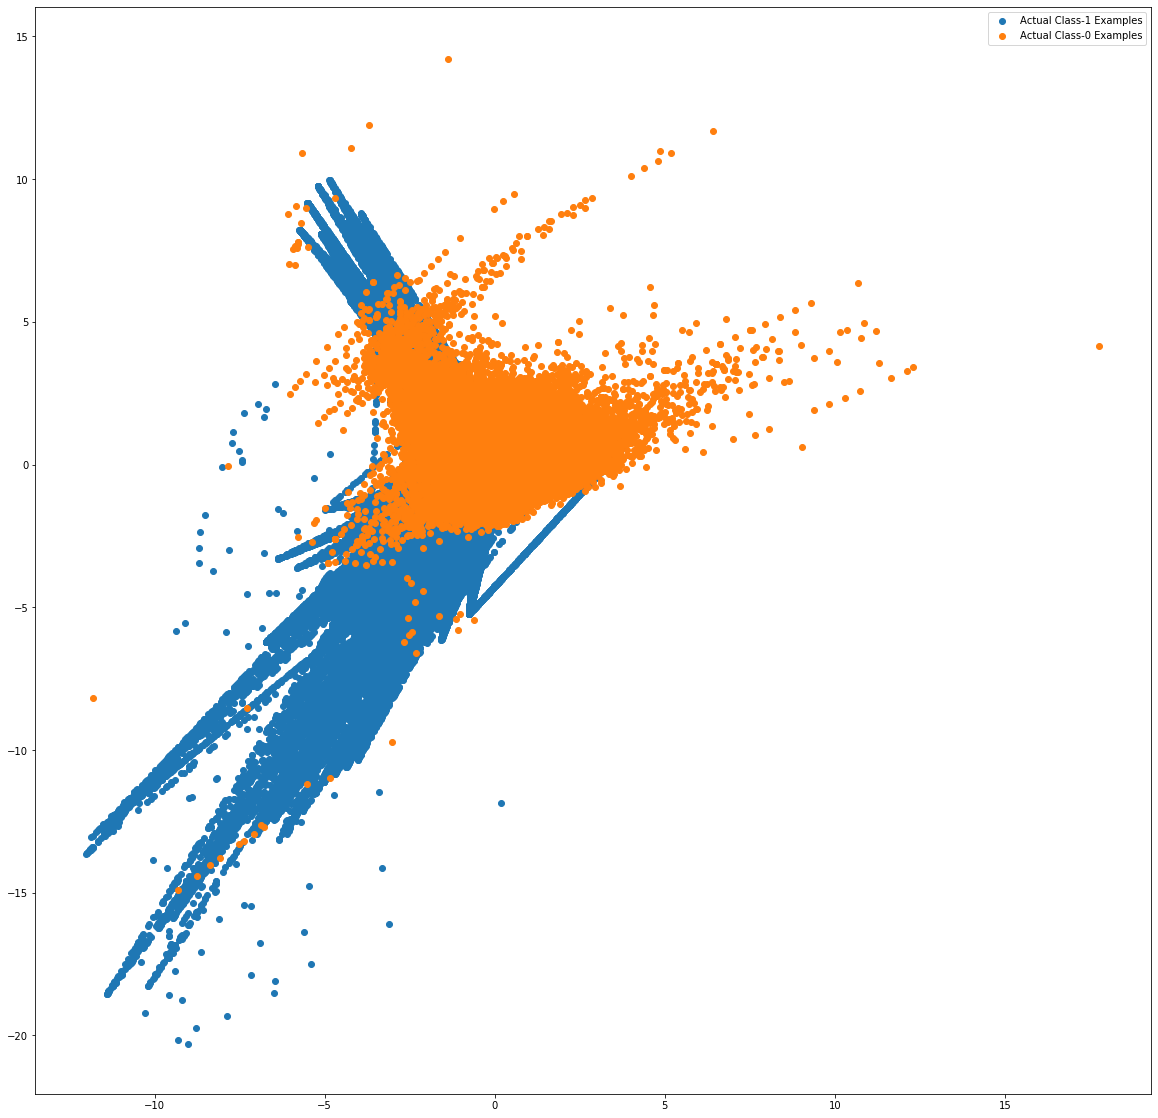

In [255]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train_s[np.where(y_train_s==1.0)]
X_train_0 = X_train_s[np.where(y_train_s==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## XGBoost

### Random Oversampling

In [256]:
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler


print('**********Before Oversampling**********')
print('the shape of train_X: {}'.format(X_train_xg.shape))
print('the shape of train_y: {} \n'.format(y_train_xg.shape))
print("y_train count: '1': Fraud ==> {}".format(sum(y == 1)))
print("y_train count: '0': Not-Fraud ==> {}".format(sum(y == 0)))

oversample = RandomOverSampler(random_state=42)

X_train_over, y_train_over = oversample.fit_sample(X_train_xg, y_train_xg)

print('**********After Oversampling**********')
print('the shape of train_X: {}'.format(X_train_over.shape))
print('the shape of train_y: {} \n'.format(y_train_over.shape))

print("y_train count: '1': Fraud ==> {}".format(sum(y_train_over==1)))
print("y_train count: '0': Not-Fraud ==>{}".format(sum(y_train_over==0)))

**********Before Oversampling**********
the shape of train_X: (199364, 29)
the shape of train_y: (199364,) 

y_train count: '1': Fraud ==> 492
y_train count: '0': Not-Fraud ==> 284315
**********After Oversampling**********
the shape of train_X: (398028, 29)
the shape of train_y: (398028,) 

y_train count: '1': Fraud ==> 199014
y_train count: '0': Not-Fraud ==>199014


Train Test Split

In [257]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_train_over, y_train_over, test_size=0.3, random_state=100)

In [258]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.2,
          'max_depth': 4, 
          'n_estimators':60,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
model = XGBClassifier(params = params)
model.fit(X_train_s, y_train_s)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic',
       params={'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 60, 'subsample': 0.9, 'objective': 'binary:logistic'},
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1)

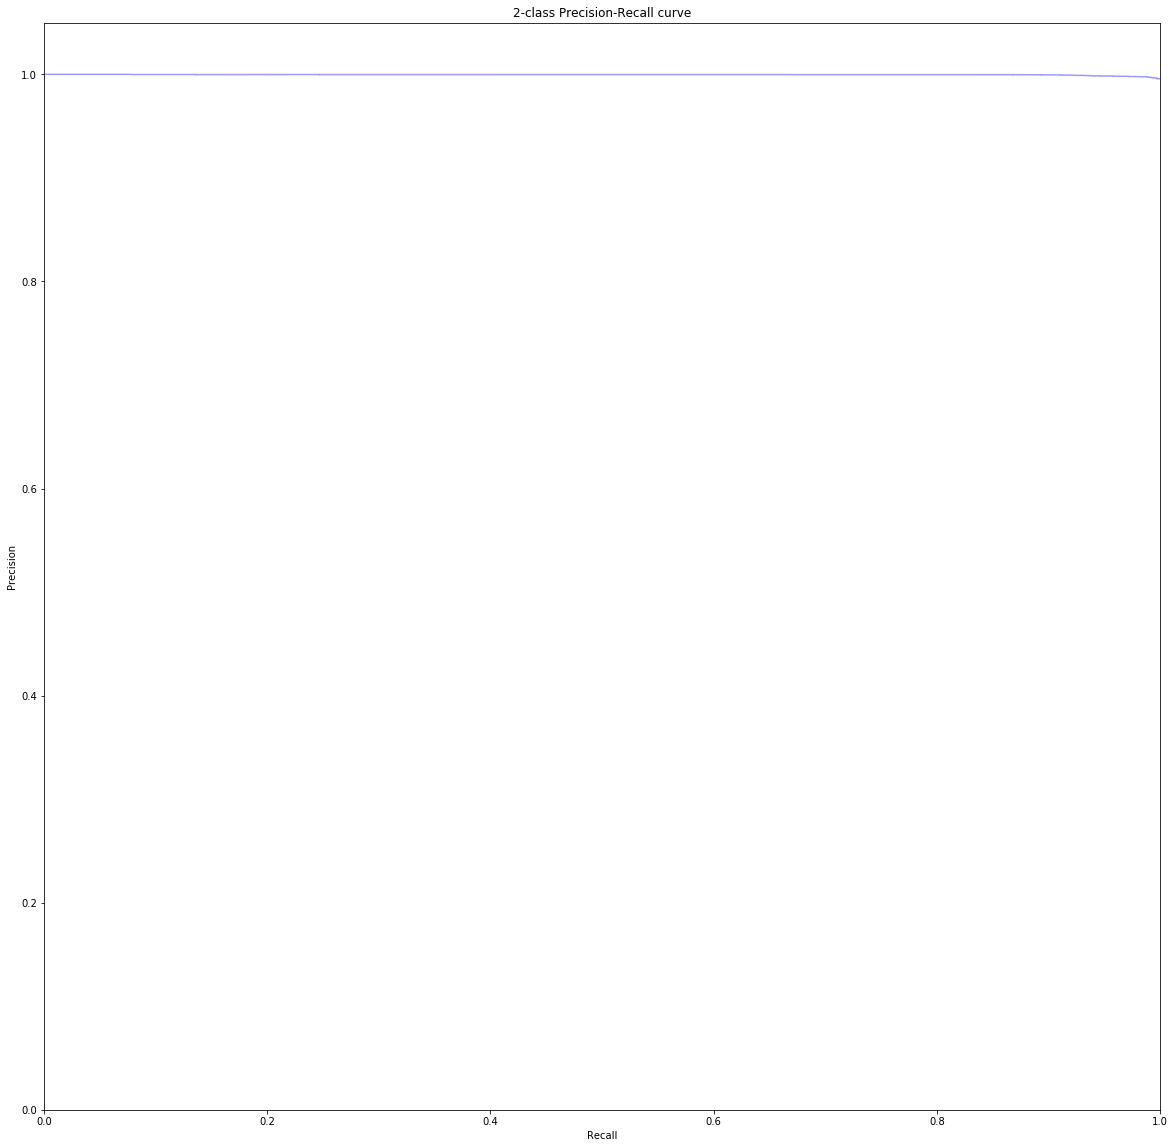

Threshold cutoff:  0.5378801822662354
Max F1-score at cut-off :  0.9979052435675956


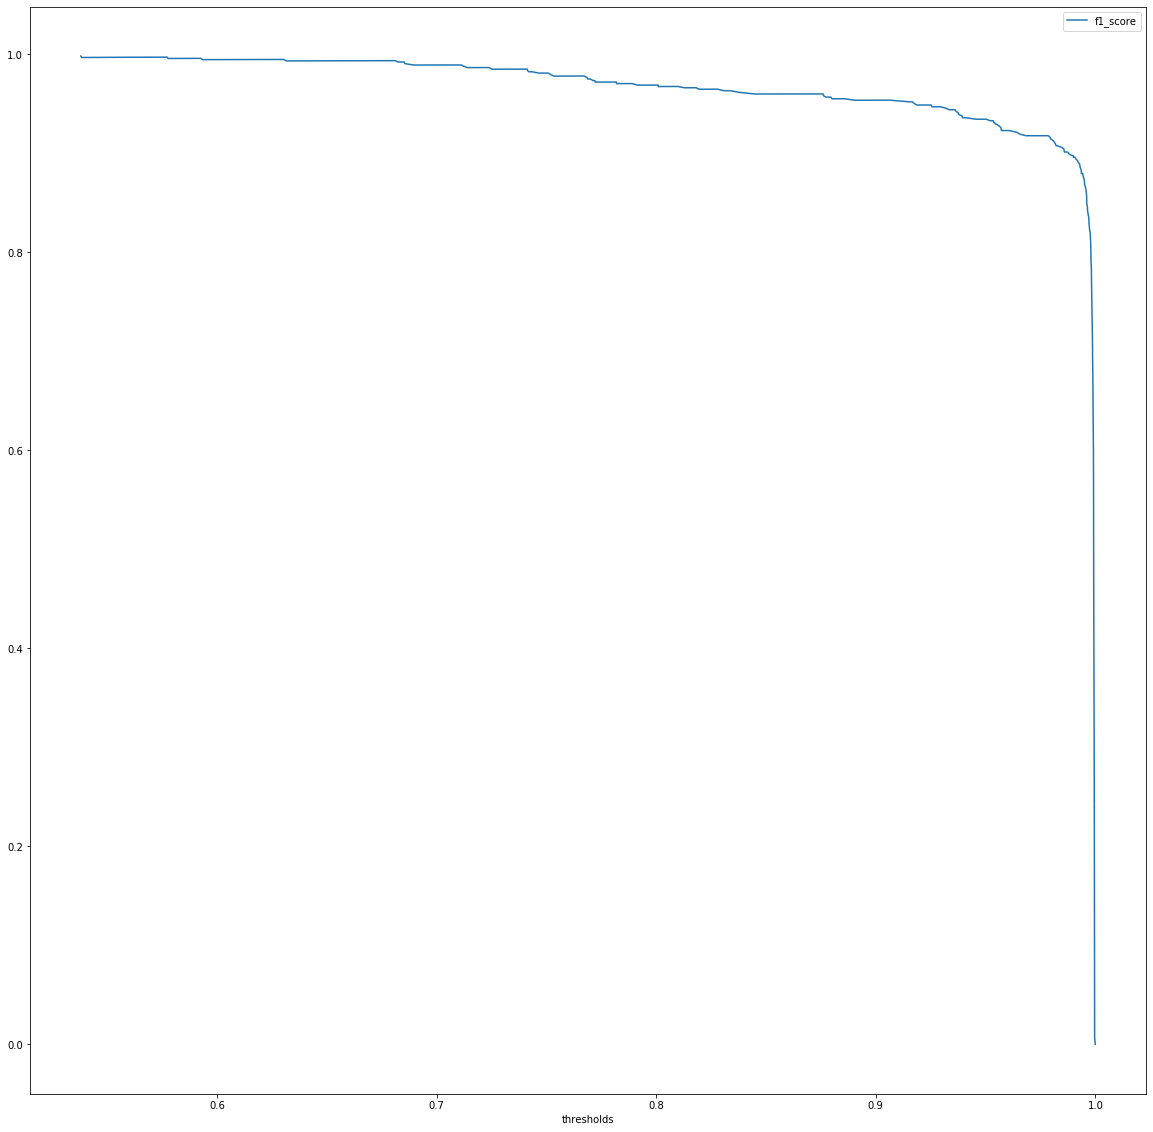

In [259]:
# predict and show Precision Recall
showPrecisonRecall(X_train_s,X_test_s,y_test_s,model)

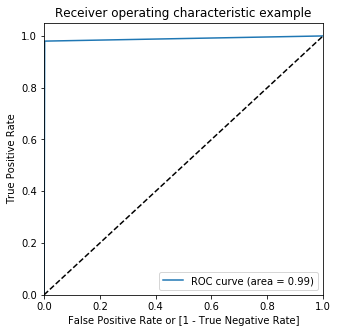

ROC_AUC Score ==> 0.99
Not Fraud Accuracy Rate:(Specificity) ==> 0.9953205977558995
Fraud Accuracy Rate:(Sensitivity) ==> 1.0
************Training Results*********************
Accuracy Score:   0.998
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    139391
           1       1.00      1.00      1.00    139228

   micro avg       1.00      1.00      1.00    278619
   macro avg       1.00      1.00      1.00    278619
weighted avg       1.00      1.00      1.00    278619

************Test Results*********************
Accuracy Score:   0.998
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     59623
           1       1.00      1.00      1.00     59786

   micro avg       1.00      1.00      1.00    119409
   macro avg       1.00      1.00      1.00    119409
weighted avg       1.00      1.00      1.00    119409



In [260]:
# Threshold
pred_probs_test = (model.predict_proba(X_test_s)[:,1] >= 0.7).astype(bool) # set threshold as 0.7
y_test_pred = (model.predict(X_test_s) >= 0.7).astype(bool)

#showscores
#showscores(X_train_s,X_test_s,y_train_s,y_test_s,model,pred_probs_test_s,y_test_pred_s)

y_pred_train = model.predict((X_train_s)) 

#roc-curve
draw_roc(y_test_s, pred_probs_test)

print("ROC_AUC Score ==> {:2.2}".format(metrics.roc_auc_score(y_test_s, pred_probs_test)))
TN = (confusion_matrix(y_test_s,y_test_pred))[0][0]
FP = (confusion_matrix(y_test_s,y_test_pred))[0][1]
FN = (confusion_matrix(y_test_s,y_test_pred))[1][0]
TP = (confusion_matrix(y_test_s,y_test_pred))[1][1]
print("Not Fraud Accuracy Rate:(Specificity) ==> {}".format(TN/(TN+FP)))
print("Fraud Accuracy Rate:(Sensitivity) ==> {}".format(TP/(TP+FN)))
print("************Training Results*********************")
print("Accuracy Score:  ",round(accuracy_score(y_train_s,y_pred_train),3))
print(classification_report(y_train_s,y_pred_train))

print("************Test Results*********************")
print("Accuracy Score:  ",round(accuracy_score(y_test_s,y_test_pred),3))
print(classification_report(y_test_s,y_test_pred))



### Print the class distribution after applying SMOTE 

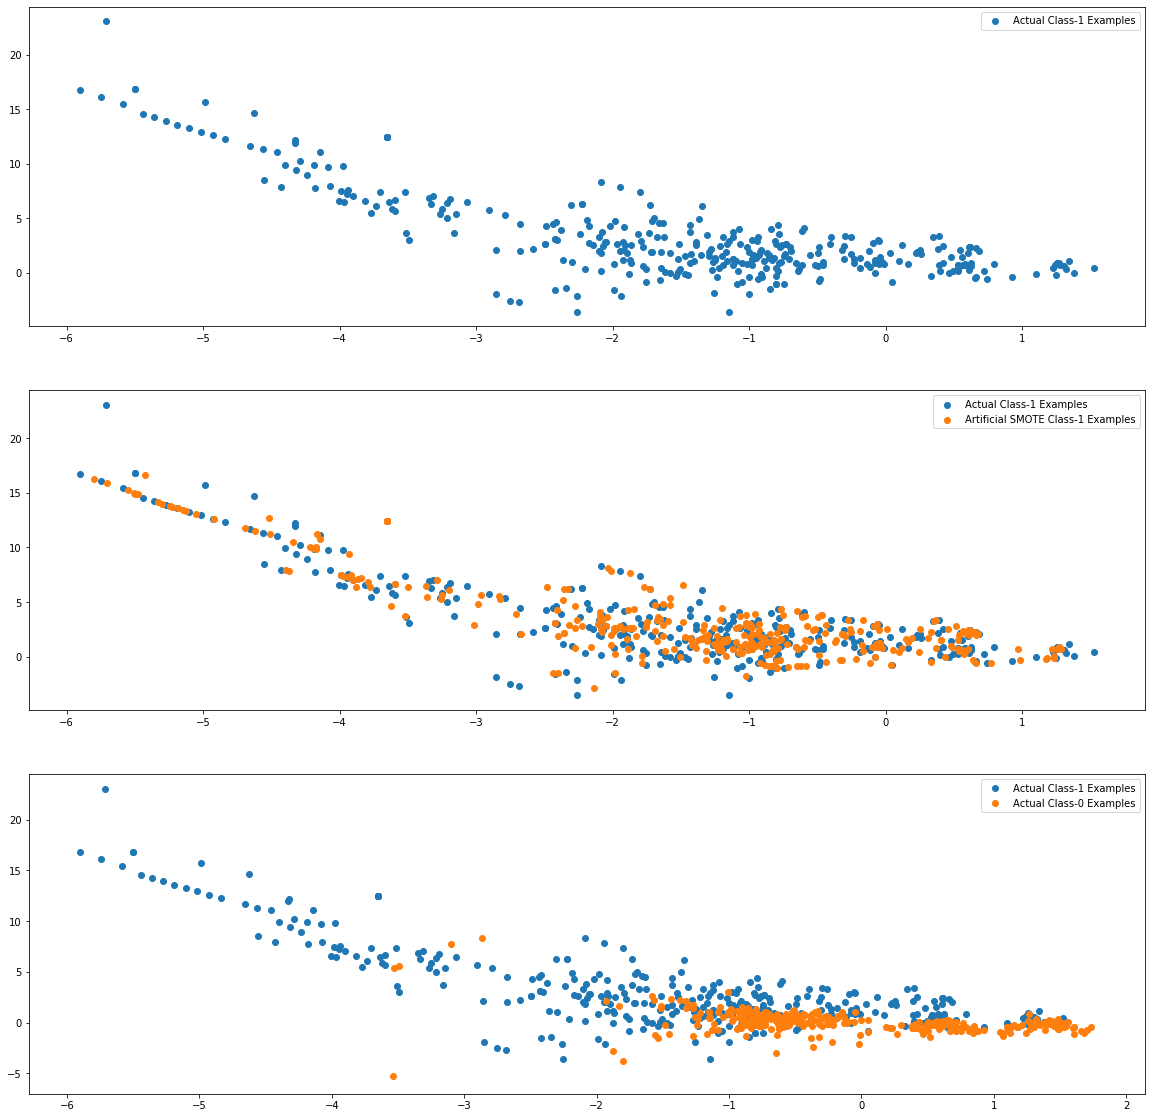

In [261]:
import warnings
warnings.filterwarnings("ignore")


sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_sample(X_train_xg, y_train_xg)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train_xg.shape[0]:]

X_train_1 = X_train_xg.to_numpy()[np.where(y_train_xg==1.0)]
X_train_0 = X_train_xg.to_numpy()[np.where(y_train_xg==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [262]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_train_smote, y_train_smote, test_size=0.3, random_state=100)

In [263]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.2,
          'max_depth': 4, 
          'n_estimators':60,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
model = XGBClassifier(params = params)
model.fit(X_train_s, y_train_s)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic',
       params={'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 60, 'subsample': 0.9, 'objective': 'binary:logistic'},
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1)

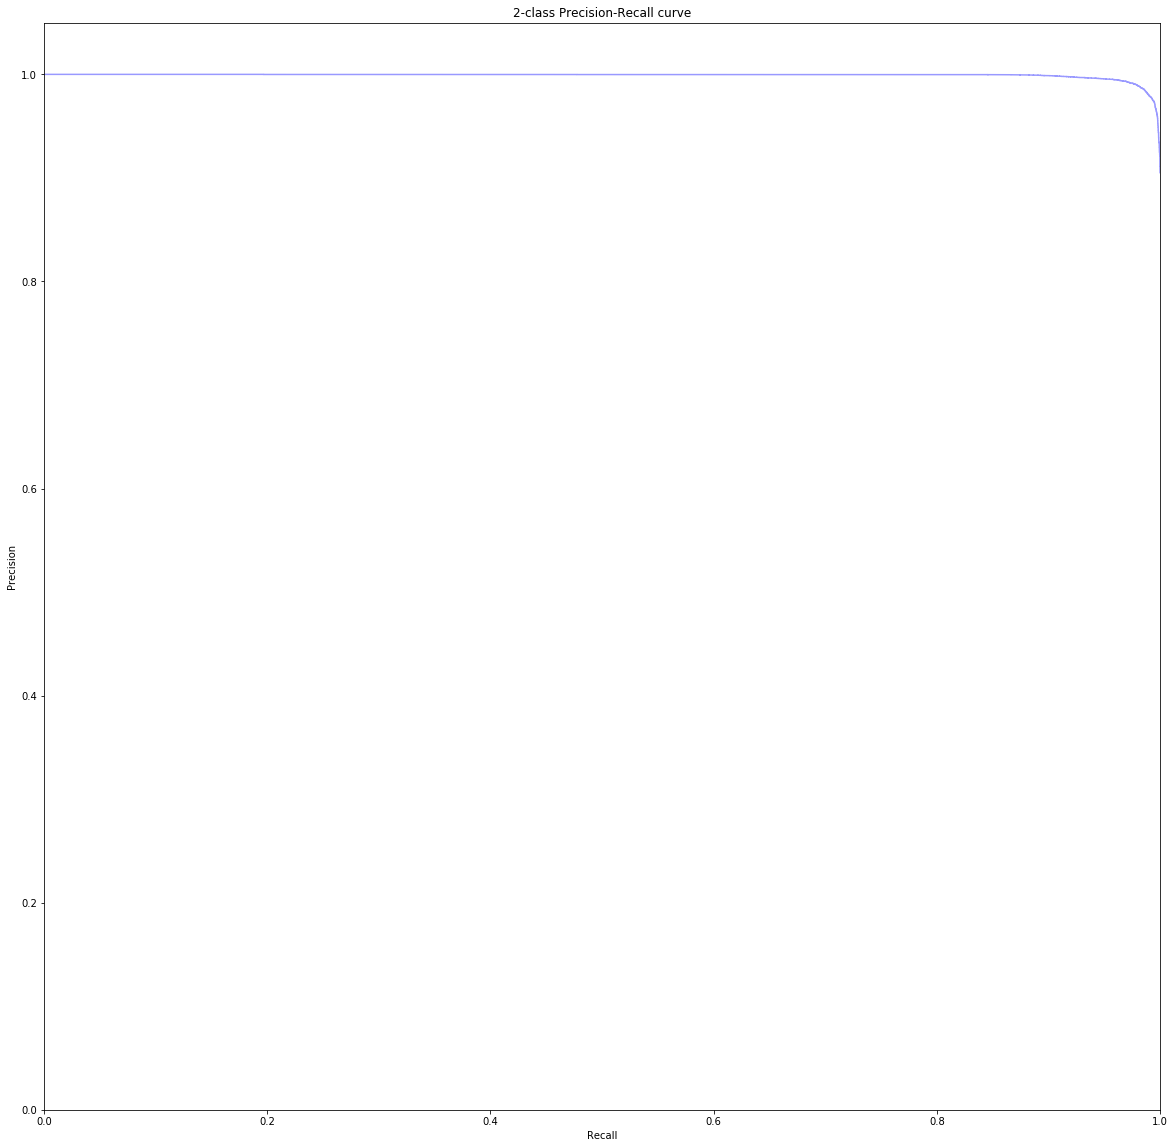

Threshold cutoff:  0.4176601767539978
Max F1-score at cut-off :  0.9856323280980814


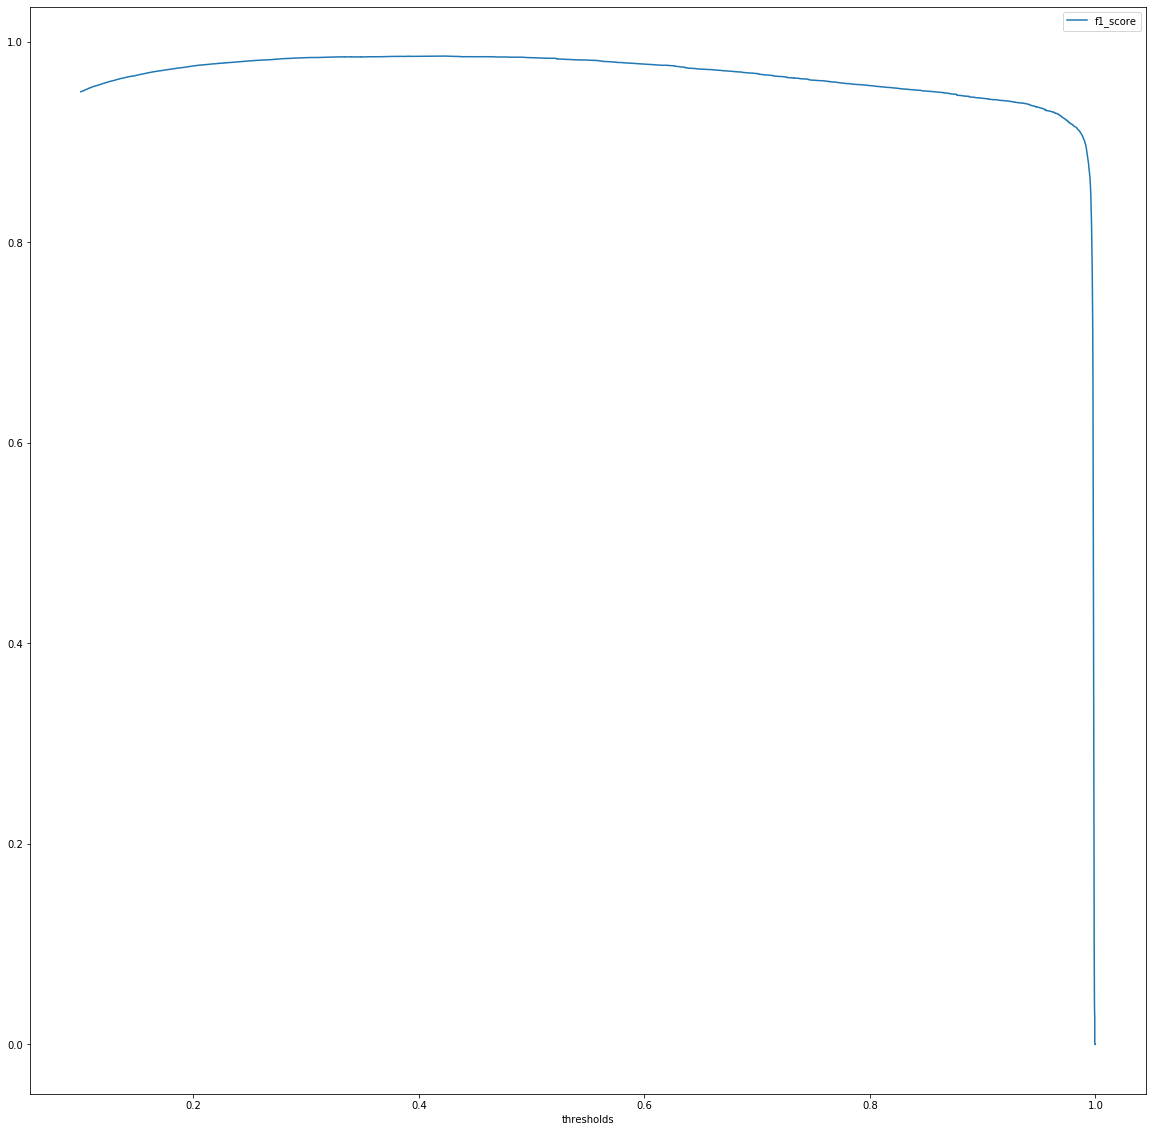

In [264]:
# predict and show Precision Recall
showPrecisonRecall(X_train_s,X_test_s,y_test_s,model)

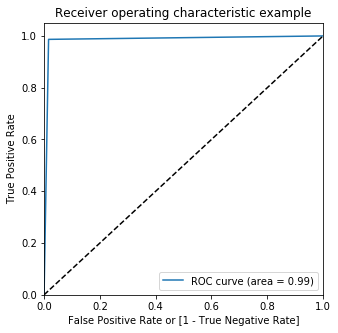

ROC_AUC Score ==> 0.99
Not Fraud Accuracy Rate:(Specificity) ==> 0.9905908793586368
Fraud Accuracy Rate:(Sensitivity) ==> 0.9774863680460308
************Training Results*********************
Accuracy Score:   0.984
              precision    recall  f1-score   support

           0       0.98      0.99      0.98    139391
           1       0.99      0.98      0.98    139228

   micro avg       0.98      0.98      0.98    278619
   macro avg       0.98      0.98      0.98    278619
weighted avg       0.98      0.98      0.98    278619

************Test Results*********************
Accuracy Score:   0.984
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     59623
           1       0.99      0.98      0.98     59786

   micro avg       0.98      0.98      0.98    119409
   macro avg       0.98      0.98      0.98    119409
weighted avg       0.98      0.98      0.98    119409



In [265]:
# Threshold
pred_probs_test = (model.predict_proba(X_test_s)[:,1] >= 0.4).astype(bool) # set threshold as 0.4
y_test_pred = (model.predict(X_test_s) >= 0.4).astype(bool)

#showscores
#showscores(X_train_s,X_test_s,y_train_s,y_test_s,model,pred_probs_test_s,y_test_pred_s)

y_pred_train = model.predict((X_train_s)) 

#roc-curve
draw_roc(y_test_s, pred_probs_test)

print("ROC_AUC Score ==> {:2.2}".format(metrics.roc_auc_score(y_test_s, pred_probs_test)))
TN = (confusion_matrix(y_test_s,y_test_pred))[0][0]
FP = (confusion_matrix(y_test_s,y_test_pred))[0][1]
FN = (confusion_matrix(y_test_s,y_test_pred))[1][0]
TP = (confusion_matrix(y_test_s,y_test_pred))[1][1]
print("Not Fraud Accuracy Rate:(Specificity) ==> {}".format(TN/(TN+FP)))
print("Fraud Accuracy Rate:(Sensitivity) ==> {}".format(TP/(TP+FN)))

print("************Training Results*********************")
print("Accuracy Score:  ",round(accuracy_score(y_train_s,y_pred_train),3))
print(classification_report(y_train_s,y_pred_train))

print("************Test Results*********************")
print("Accuracy Score:  ",round(accuracy_score(y_test_s,y_test_pred),3))
print(classification_report(y_test_s,y_test_pred))

### Print the class distribution after applying ADASYN

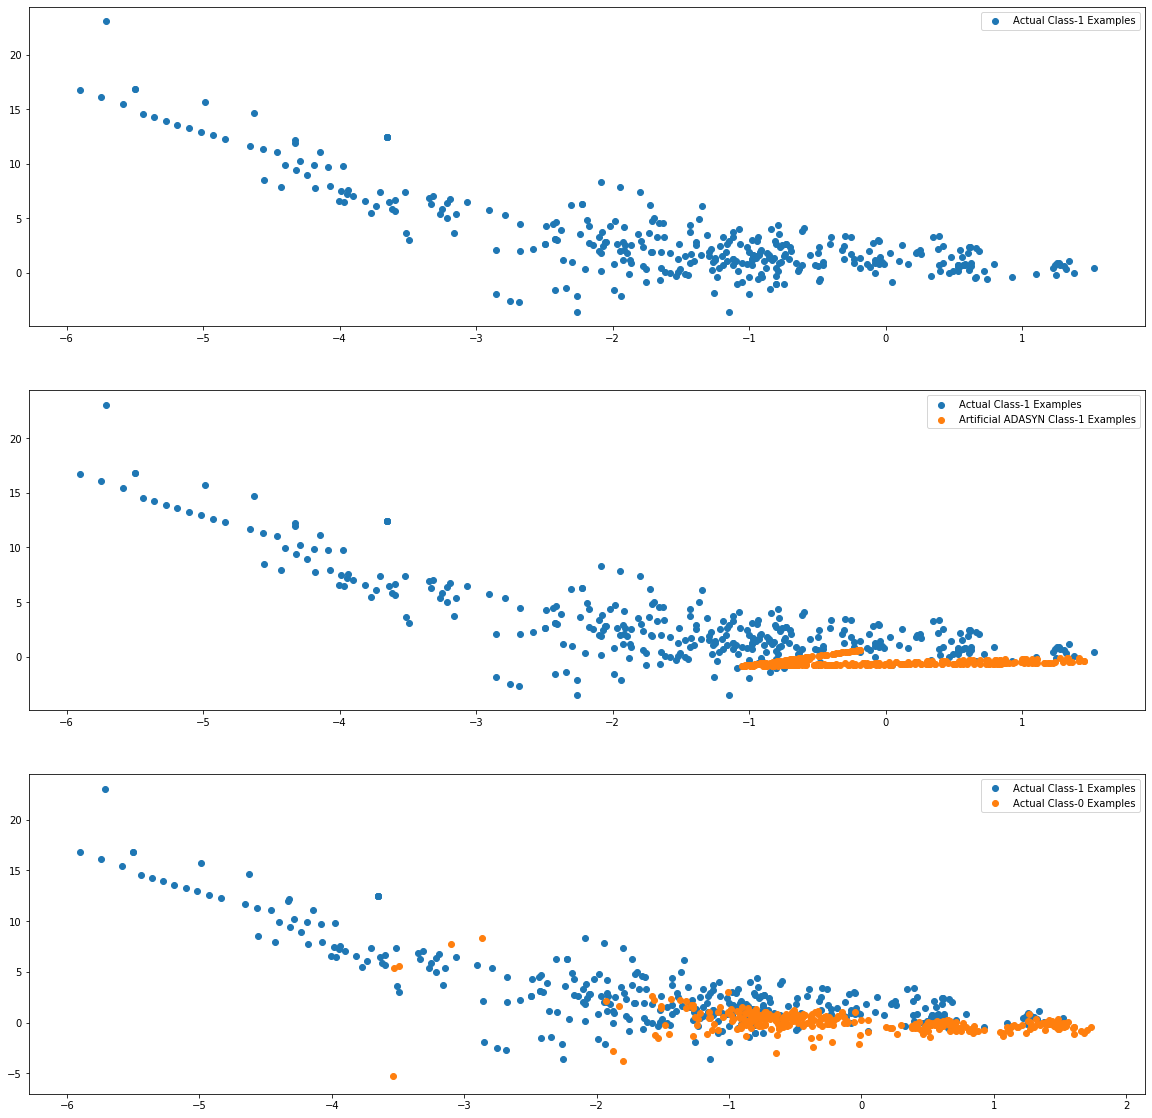

In [267]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_sample(X_train_xg, y_train_xg)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train_xg.shape[0]:]

X_train_1 = X_train_xg.to_numpy()[np.where(y_train_xg==1.0)]
X_train_0 = X_train_xg.to_numpy()[np.where(y_train_xg==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [268]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_train_adasyn, y_train_adasyn, test_size=0.3, random_state=100)

In [269]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.2,
          'max_depth': 4, 
          'n_estimators':60,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
model = XGBClassifier(params = params)
model.fit(X_train_s, y_train_s)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic',
       params={'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 60, 'subsample': 0.9, 'objective': 'binary:logistic'},
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1)

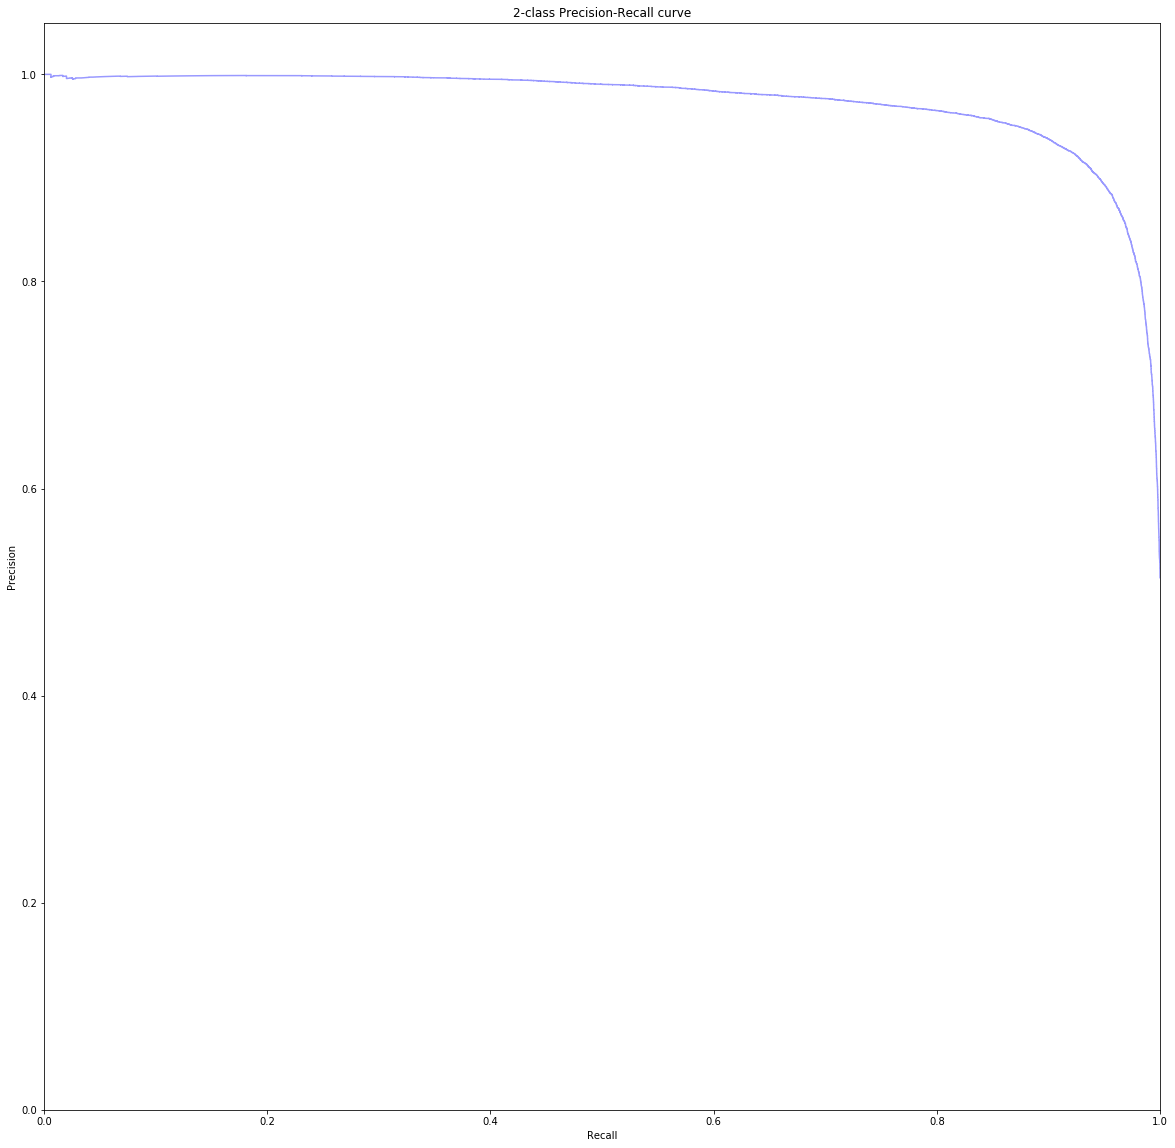

Threshold cutoff:  0.44843533635139465
Max F1-score at cut-off :  0.9235900695986724


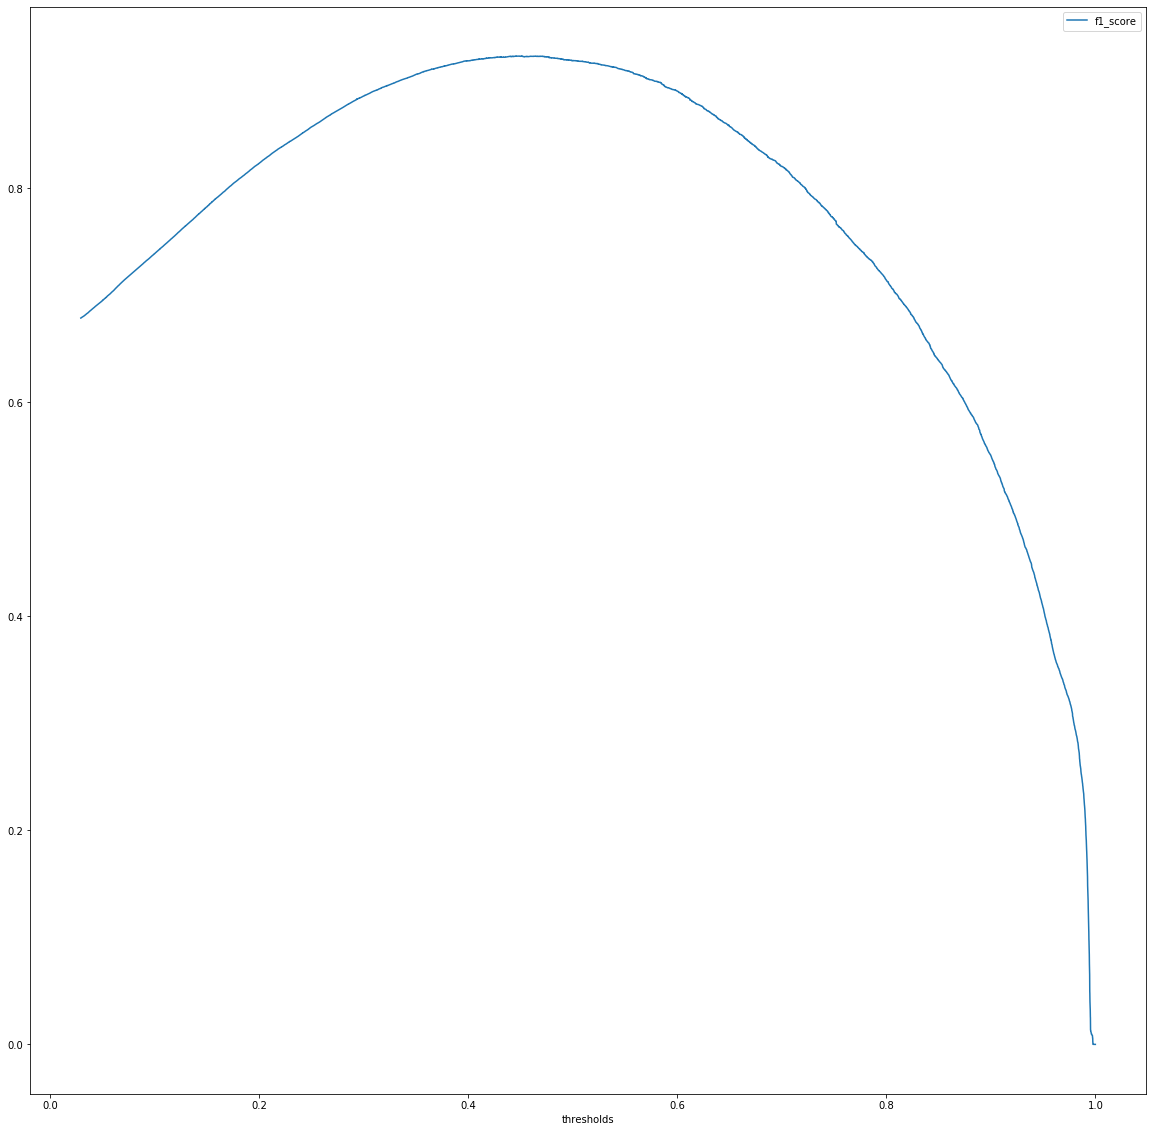

In [270]:
# predict and show Precision Recall
showPrecisonRecall(X_train_s,X_test_s,y_test_s,model)

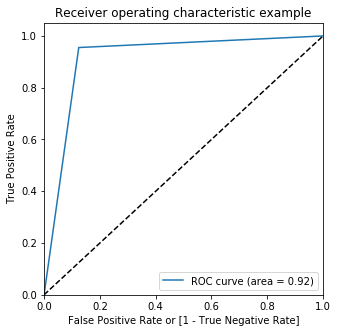

ROC_AUC Score ==> 0.92
Not Fraud Accuracy Rate:(Specificity) ==> 0.9360079297078441
Fraud Accuracy Rate:(Sensitivity) ==> 0.9047873495082405
************Training Results*********************
Accuracy Score:   0.923
              precision    recall  f1-score   support

           0       0.91      0.94      0.92    139491
           1       0.93      0.91      0.92    139130

   micro avg       0.92      0.92      0.92    278621
   macro avg       0.92      0.92      0.92    278621
weighted avg       0.92      0.92      0.92    278621

************Test Results*********************
Accuracy Score:   0.92
              precision    recall  f1-score   support

           0       0.91      0.94      0.92     59523
           1       0.93      0.90      0.92     59887

   micro avg       0.92      0.92      0.92    119410
   macro avg       0.92      0.92      0.92    119410
weighted avg       0.92      0.92      0.92    119410



In [271]:
# Threshold
pred_probs_test = (model.predict_proba(X_test_s)[:,1] >= 0.4).astype(bool) # set threshold as 0.4
y_test_pred = (model.predict(X_test_s) >= 0.4).astype(bool)

#showscores
#showscores(X_train_s,X_test_s,y_train_s,y_test_s,model,pred_probs_test_s,y_test_pred_s)

y_pred_train = model.predict((X_train_s)) 

#roc-curve
draw_roc(y_test_s, pred_probs_test)


print("ROC_AUC Score ==> {:2.2}".format(metrics.roc_auc_score(y_test_s, pred_probs_test)))
TN = (confusion_matrix(y_test_s,y_test_pred))[0][0]
FP = (confusion_matrix(y_test_s,y_test_pred))[0][1]
FN = (confusion_matrix(y_test_s,y_test_pred))[1][0]
TP = (confusion_matrix(y_test_s,y_test_pred))[1][1]
print("Not Fraud Accuracy Rate:(Specificity) ==> {}".format(TN/(TN+FP)))
print("Fraud Accuracy Rate:(Sensitivity) ==> {}".format(TP/(TP+FN)))

print("************Training Results*********************")
print("Accuracy Score:  ",round(accuracy_score(y_train_s,y_pred_train),3))
print(classification_report(y_train_s,y_pred_train))

print("************Test Results*********************")
print("Accuracy Score:  ",round(accuracy_score(y_test_s,y_test_pred),3))
print(classification_report(y_test_s,y_test_pred))

In [272]:
clf= model

### Print the important features of the xgboost model to understand the dataset

Top var = 14
2nd Top var = 4
3rd Top var = 11


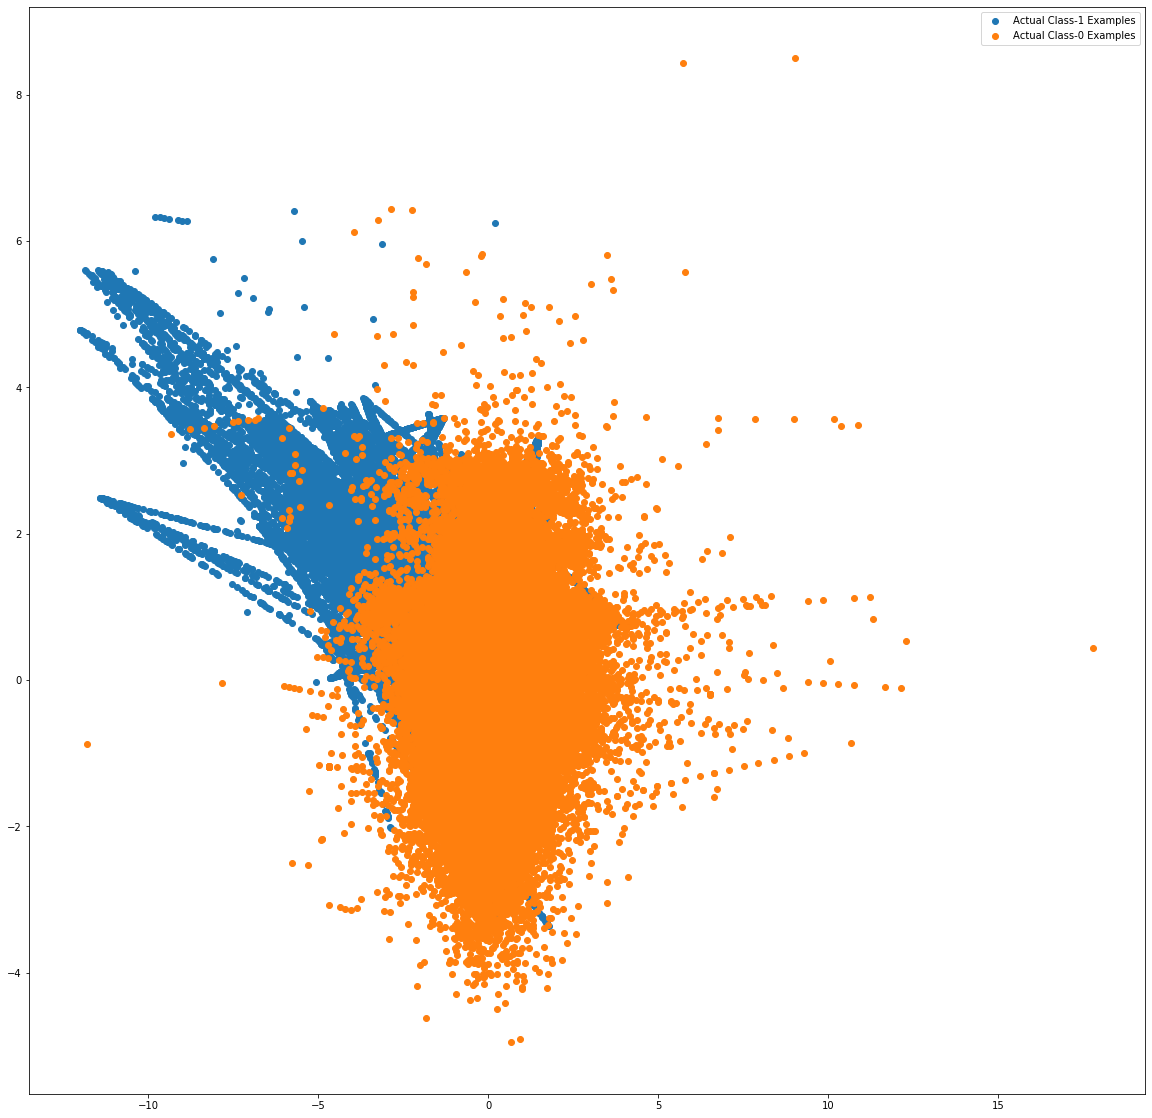

In [273]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train_s[np.where(y_train_s==1.0)]
X_train_0 = X_train_s[np.where(y_train_s==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

### Conclusion from all the sampling methods from RandomForest

-----OverSampling-------

ROC_AUC Score ==> 1.0

Not Fraud Accuracy Rate:(Specificity) ==> 0.9969139426060413

Fraud Accuracy Rate:(Sensitivity) ==> 1.0

************Training Results*********************

Accuracy Score:   0.999

                    precision    recall  f1-score   support

           0       1.00      1.00      1.00    139391
           1       1.00      1.00      1.00    139228

   micro avg       1.00      1.00      1.00    278619
   macro avg       1.00      1.00      1.00    278619
weighted avg       1.00      1.00      1.00    278619

************Test Results*********************

Accuracy Score:   0.998
              
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     59623
           1       1.00      1.00      1.00     59786

   micro avg       1.00      1.00      1.00    119409
   macro avg       1.00      1.00      1.00    119409
weighted avg       1.00      1.00      1.00    119409


-------SMOTE-------------

ROC_AUC Score ==> 0.99

Not Fraud Accuracy Rate:(Specificity) ==> 0.9950187008369253

Fraud Accuracy Rate:(Sensitivity) ==> 0.9879737731241428

************Training Results*********************

Accuracy Score:   0.992
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    139391
           1       1.00      0.99      0.99    139228

   micro avg       0.99      0.99      0.99    278619
   macro avg       0.99      0.99      0.99    278619
weighted avg       0.99      0.99      0.99    278619

************Test Results*********************

Accuracy Score:   0.991

                  precision    recall  f1-score   support

           0       0.99      1.00      0.99     59623
           1       0.99      0.99      0.99     59786

   micro avg       0.99      0.99      0.99    119409
   macro avg       0.99      0.99      0.99    119409
weighted avg       0.99      0.99      0.99    119409


-------------------ADASYN---------------------------------

ROC_AUC Score ==> 0.97

Not Fraud Accuracy Rate:(Specificity) ==> 0.9642995144733968

Fraud Accuracy Rate:(Sensitivity) ==> 0.9664868836308381

************Training Results*********************

Accuracy Score:   0.967

                   precision    recall  f1-score   support

           0       0.97      0.97      0.97    139491
           1       0.97      0.97      0.97    139130

   micro avg       0.97      0.97      0.97    278621
   macro avg       0.97      0.97      0.97    278621
weighted avg       0.97      0.97      0.97    278621

************Test Results*********************

Accuracy Score:   0.965

                  precision    recall  f1-score   support

           0       0.97      0.96      0.97     59523
           1       0.96      0.97      0.97     59887

   micro avg       0.97      0.97      0.97    119410
   macro avg       0.97      0.97      0.97    119410
weighted avg       0.97      0.97      0.97    119410




### Conclusion from all the sampling methods from XGBOOST


-----OverSampling-------

ROC_AUC Score ==> 0.99
    
    Not Fraud Accuracy Rate:(Specificity) ==> 0.9953205977558995
    
    Fraud Accuracy Rate:(Sensitivity) ==> 1.0
    
    ************Training Results*********************
    Accuracy Score:   0.998
                  precision    recall  f1-score   support

               0       1.00      1.00      1.00    139391
               1       1.00      1.00      1.00    139228

       micro avg       1.00      1.00      1.00    278619
       macro avg       1.00      1.00      1.00    278619
    weighted avg       1.00      1.00      1.00    278619

    ************Test Results*********************
    
    Accuracy Score:   0.998
                  precision    recall  f1-score   support

               0       1.00      1.00      1.00     59623
               1       1.00      1.00      1.00     59786

       micro avg       1.00      1.00      1.00    119409
       macro avg       1.00      1.00      1.00    119409
    weighted avg       1.00      1.00      1.00    119409

-------SMOTE-------------

ROC_AUC Score ==> 0.99
   
   Not Fraud Accuracy Rate:(Specificity) ==> 0.9905908793586368
   
   Fraud Accuracy Rate:(Sensitivity) ==> 0.9774863680460308
   
   ************Training Results*********************
    
    Accuracy Score:   0.984
                  precision    recall  f1-score   support

               0       0.98      0.99      0.98    139391
               1       0.99      0.98      0.98    139228

       micro avg       0.98      0.98      0.98    278619
       macro avg       0.98      0.98      0.98    278619
    weighted avg       0.98      0.98      0.98    278619

    ************Test Results*********************
    Accuracy Score:   0.984
                  precision    recall  f1-score   support

               0       0.98      0.99      0.98     59623
               1       0.99      0.98      0.98     59786

       micro avg       0.98      0.98      0.98    119409
       macro avg       0.98      0.98      0.98    119409
    weighted avg       0.98      0.98      0.98    119409


-------------------ADASYN---------------------------------

ROC_AUC Score ==> 0.92

Not Fraud Accuracy Rate:(Specificity) ==> 0.9360079297078441

Fraud Accuracy Rate:(Sensitivity) ==> 0.9047873495082405

************Training Results*********************

Accuracy Score:   0.923

                  precision    recall  f1-score   support

               0       0.91      0.94      0.92    139491
               1       0.93      0.91      0.92    139130

       micro avg       0.92      0.92      0.92    278621
       macro avg       0.92      0.92      0.92    278621
    weighted avg       0.92      0.92      0.92    278621

    ************Test Results*********************
    Accuracy Score:   0.92
                  precision    recall  f1-score   support

               0       0.91      0.94      0.92     59523
               1       0.93      0.90      0.92     59887

       micro avg       0.92      0.92      0.92    119410
       macro avg       0.92      0.92      0.92    119410
    weighted avg       0.92      0.92      0.92    119410

# As per on train and test accuracy and recall, F1 score ADASYN performs the best and RandomForest give the maximum percentage